In [2]:
import numpy as np

from transform_data import *
from graphs_aux import *
import time
import matplotlib
import matplotlib.pyplot as plt
import textwrap
import scipy.stats as stats
import pandas as pd

from infrastructure.configuration import param
import matplotlib.pylab as pylab
import seaborn
seaborn.set_style('darkgrid', {'legend.frameon':True})
fontsize = 70
params = {'legend.fontsize': fontsize,
  'figure.figsize': (18, 15),
 'axes.labelsize': fontsize,
 'axes.titlesize':fontsize,
 'xtick.labelsize':fontsize,
 'ytick.labelsize':fontsize}
pylab.rcParams.update(params)

plt.style.use('ggplot')
%matplotlib inline

In [4]:
#from load_data_down_GSE63347 import load_data_down_GSE63347
#from down_GSE63347_config import config

#from configurations.load_data_down_GSE63347 import load_data_down_GSE63347_cpg_horvath
#from configurations.config_down_GSE63347_cpg_horvath import config

from configurations.current_config import get_config, get_data

X, y, _, genes_names, _ = get_data()
config = get_config()

Data loaded:  0.756177167219
float64 (729L, 15605L)
(729L, 15605L) 15605


In [19]:
parenclitics = None
for id_sample in config.params["id_sample"]:
    parenclitic = pd.read_pickle(config.ofname(["parenclitic"], ext = ".pkl", include_set = config.params_sets["parenclitic_sample"]))
    parenclitic.to_pickle(config.ofname(["parenclitic"], ext = ".pkl", include_set = config.params_sets["parenclitic_sample"]), compression = "gzip")
    if parenclitics is None:
        parenclitics = parenclitic
    else:
        parenclitics = pd.concat([parenclitics, parenclitic], ignore_index=True)

In [4]:
#X, y, _, genes_names = load_data_down_GSE63347_cpg_horvath()
#X, y, _, genes_names = load_data_cancer()
#X, y, _, cpgs_names = load_data_mongoloids_hannum_cpgs()
#X, y, _, cpgs_names = load_data_mongoloids_horvath_cpgs()
from load_parenclitics import load_parenclitics
parenclitics = load_parenclitics(config, by_sample = True)

In [13]:
print parenclitics.keys()
#print config.params["kde_mask"].value


Index([u'degrees', u'max_degrees', u'mean_degrees', u'std_degrees',
       u'efficiency', u'betweenness', u'max_betweenness', u'mean_betweenness',
       u'std_betweenness', u'closeness', u'max_closeness', u'mean_closeness',
       u'std_closeness', u'pagerank', u'max_pagerank', u'mean_pagerank',
       u'std_pagerank', u'eigenvector_centrality',
       u'mean_eigenvector_centrality', u'eigenvalues',
       u'eigenvalues_intervals', u'eigenvalues_intervals_normalized', u'IPR',
       u'max_IPR', u'mean_IPR', u'num_edges', u'weights', u'max_weights',
       u'mean_weights', u'std_weights', u'robustness'],
      dtype='object')


In [4]:
def load_graph(id_thr, id_sample):
    config.params["id_sample"].set_tick(id_sample)
    if "thr_p" in config.params:
        config.params["thr_p"].set_tick(id_thr)
    data = np.load(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
    g = data['G']
    g = np.unpackbits(g, axis = 1)[:, :X.shape[1]].astype(np.bool)
    g = igraph.Graph.Weighted_Adjacency(g.tolist(), mode=igraph.ADJ_UNDIRECTED)
    g.vs["name"] = genes_names
    return g


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
[15 56]
[0 0]
71


<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

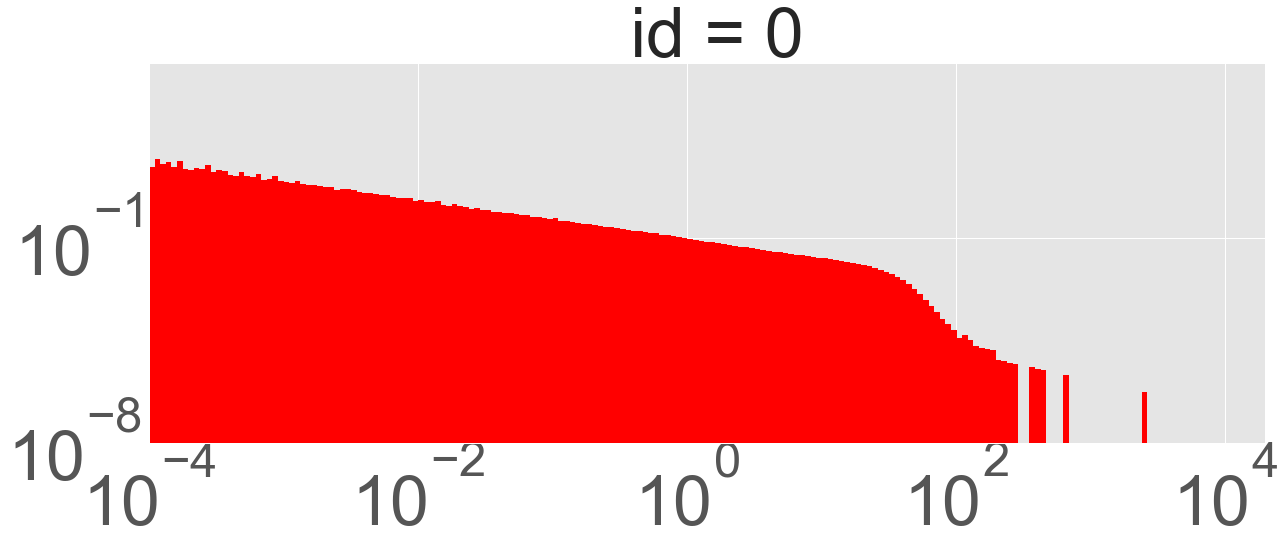

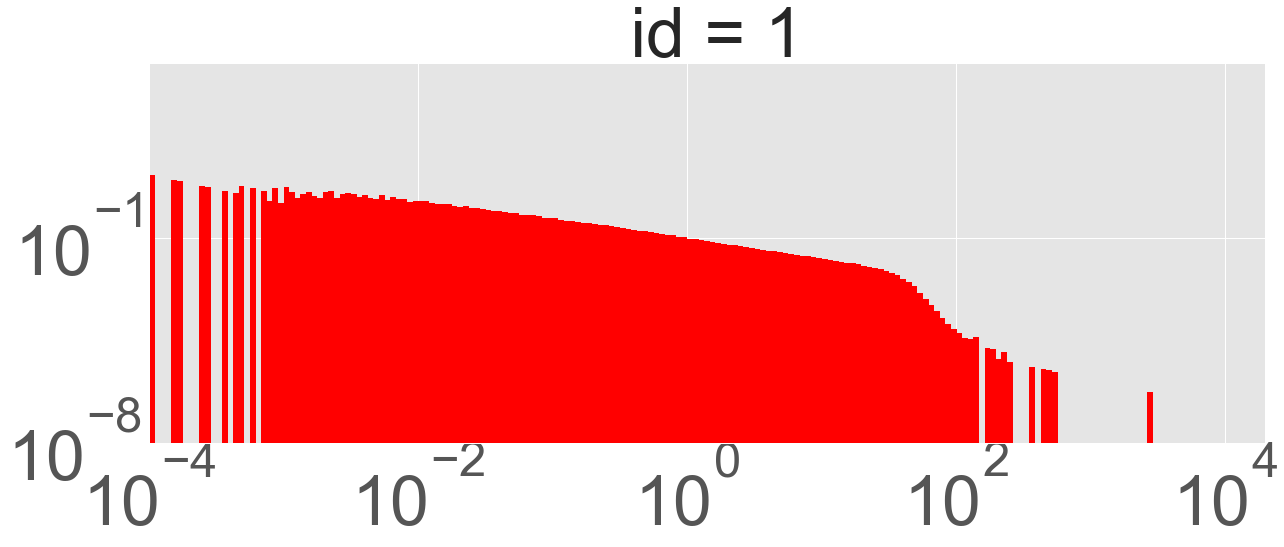

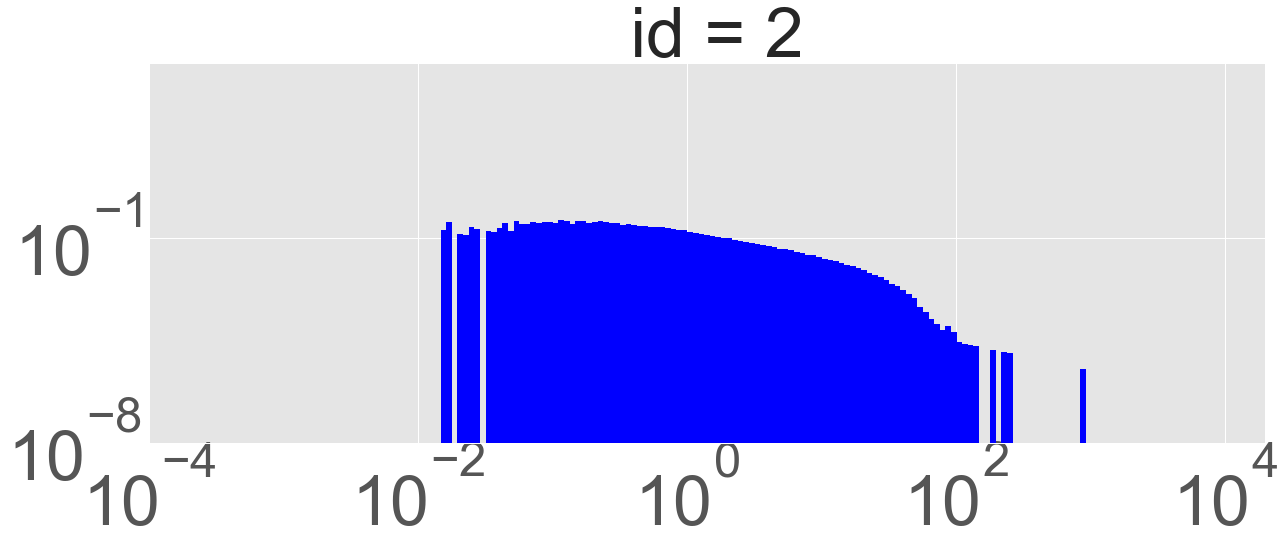

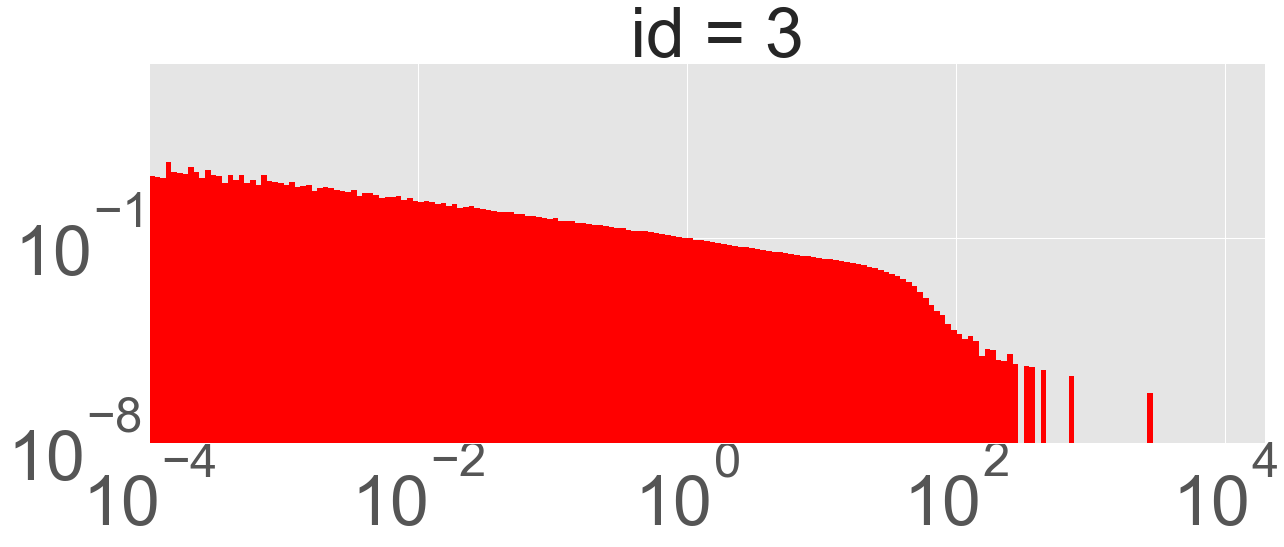

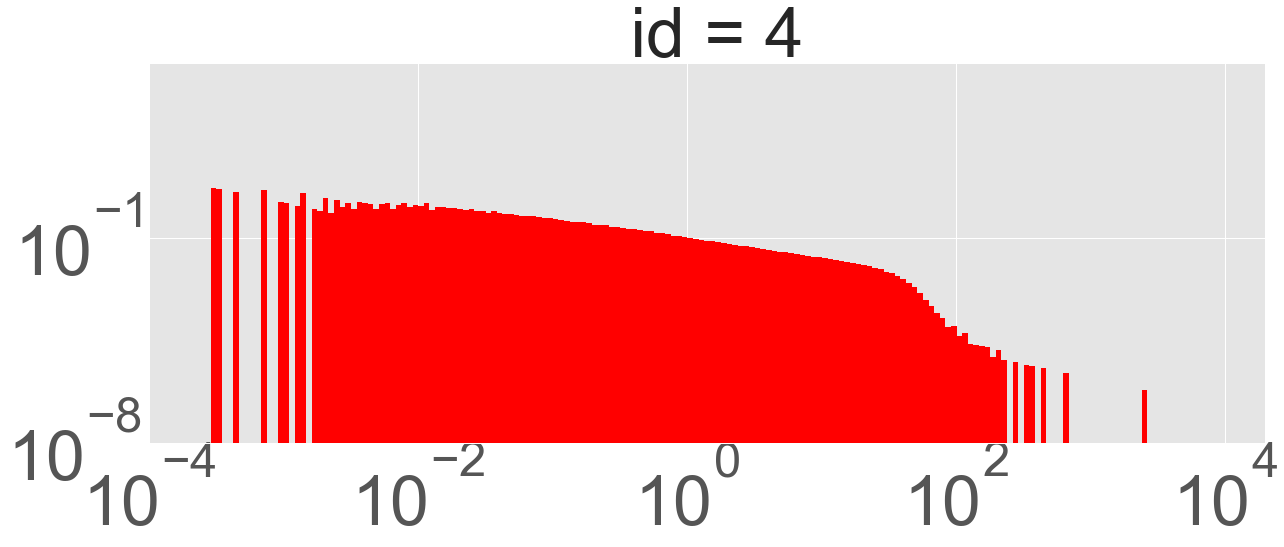

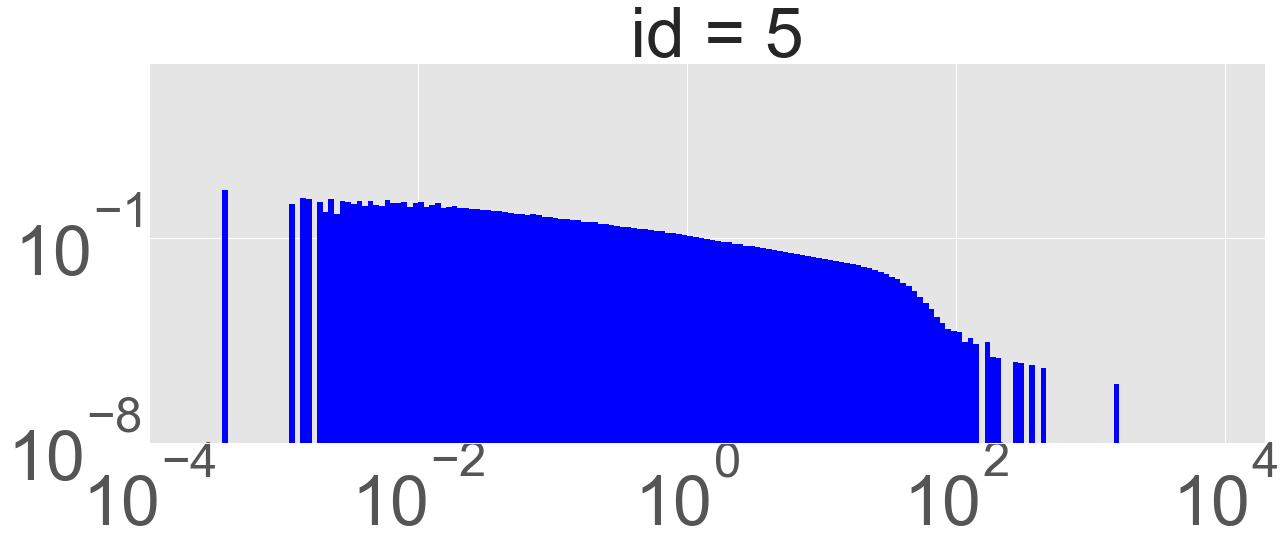

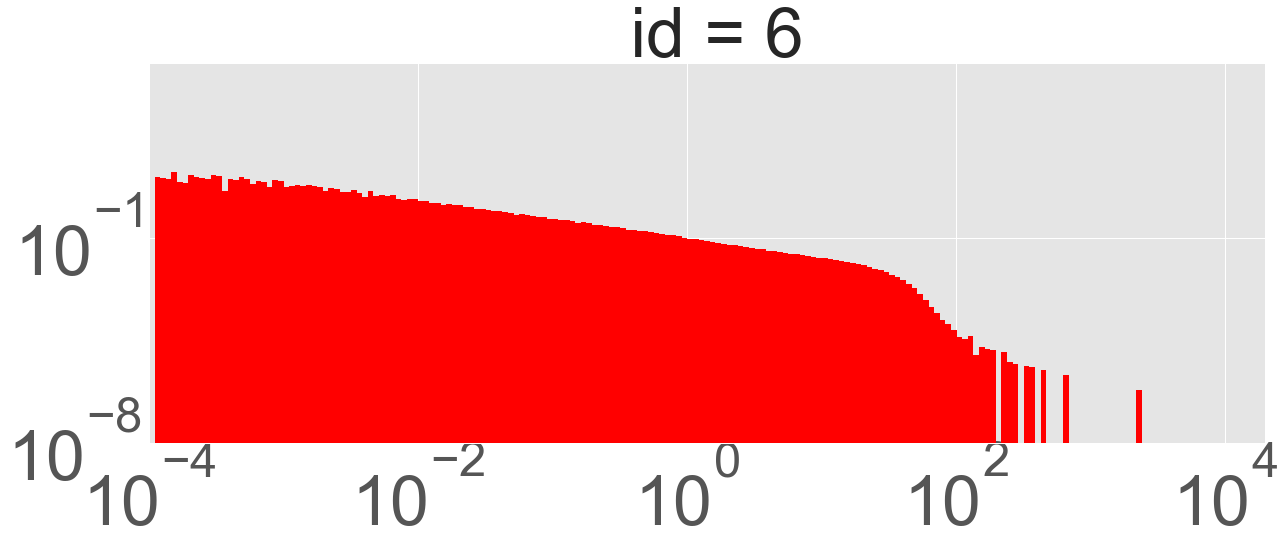

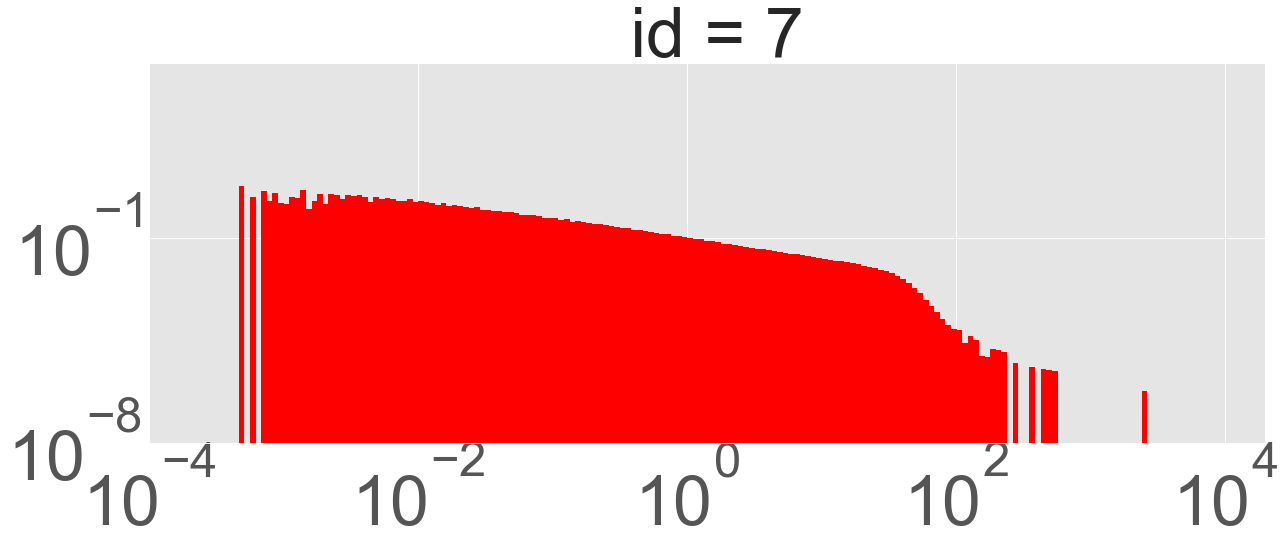

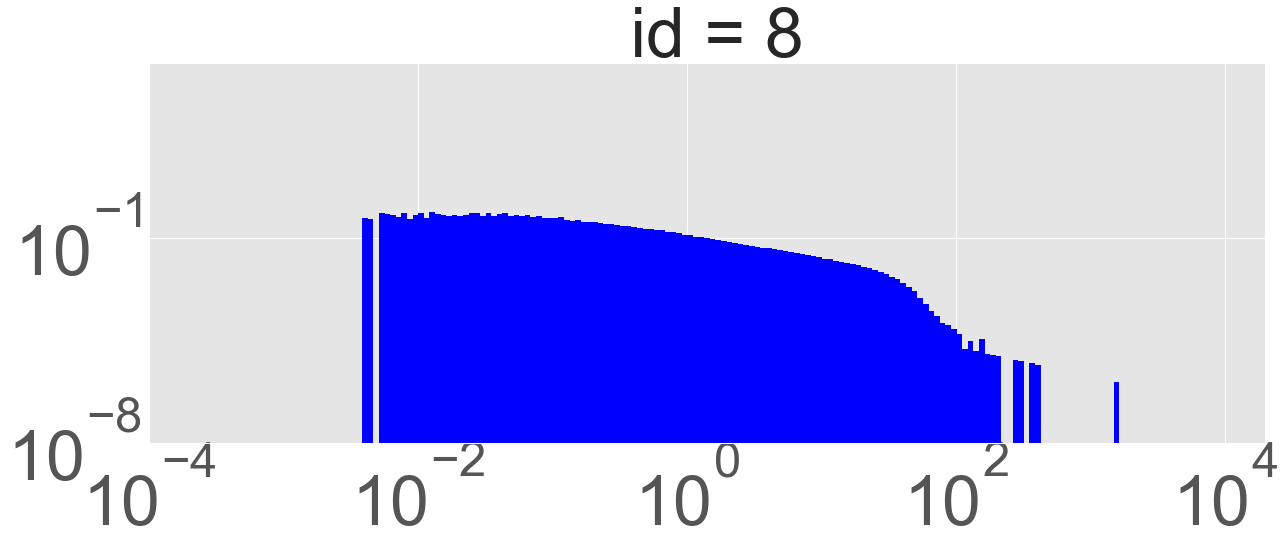

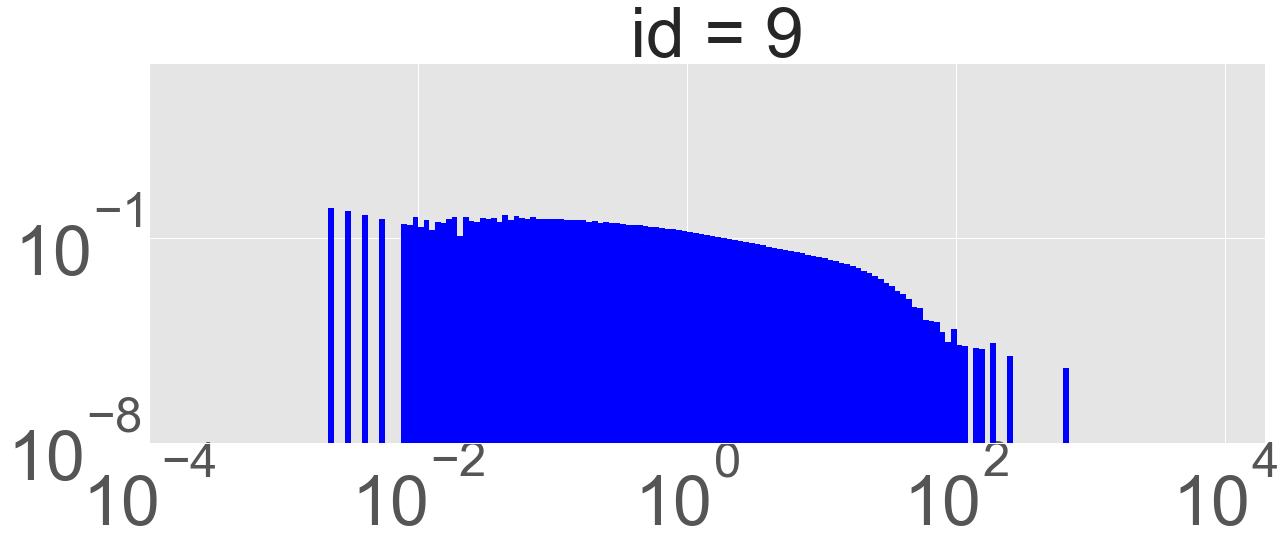

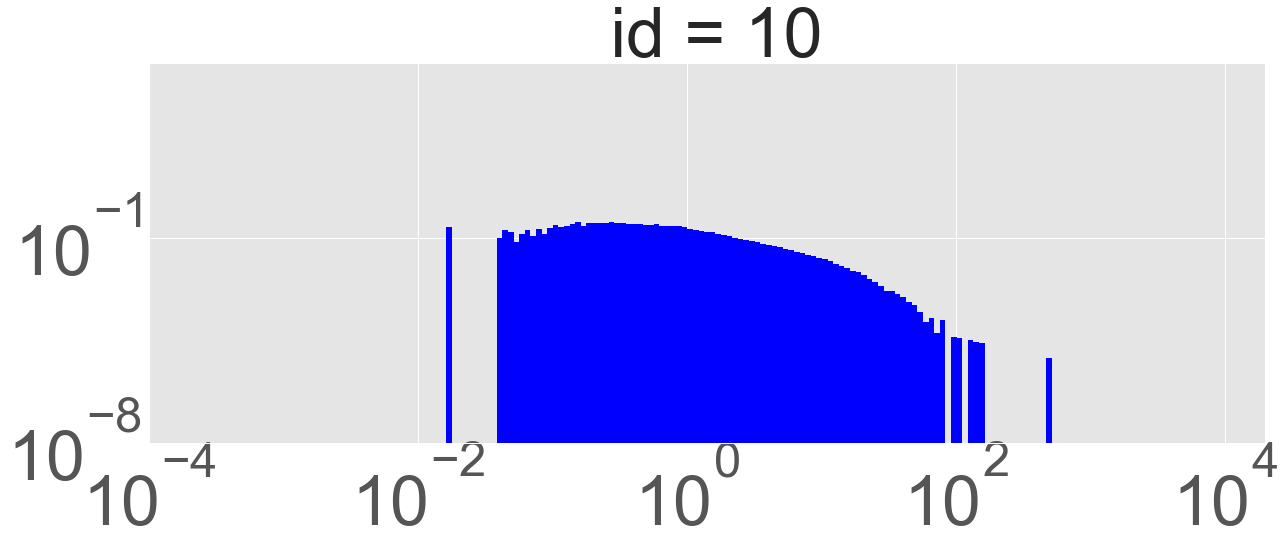

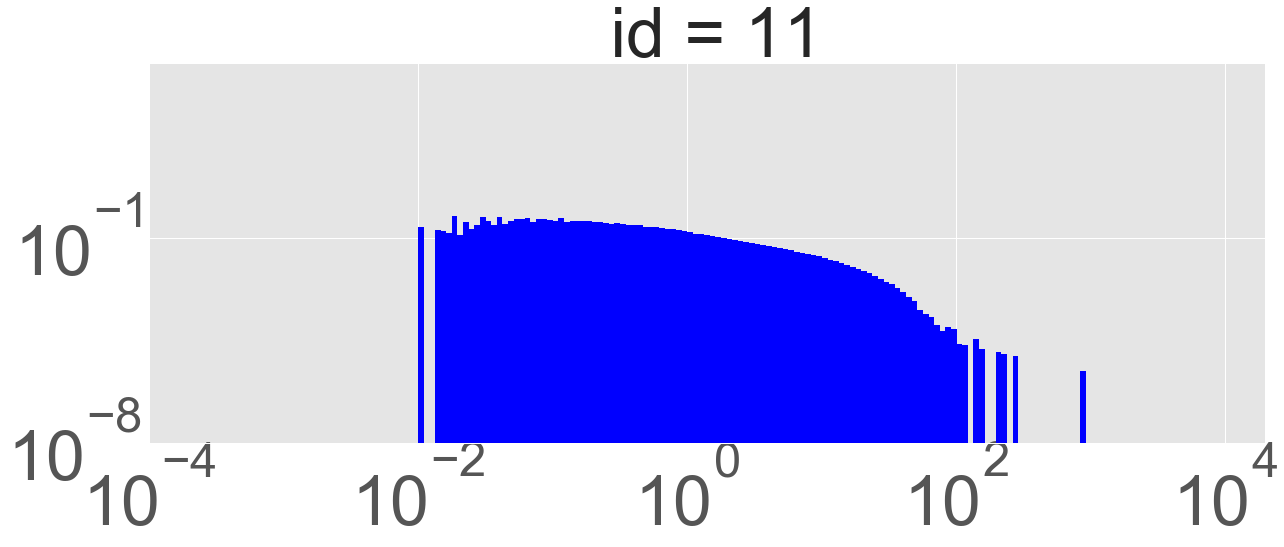

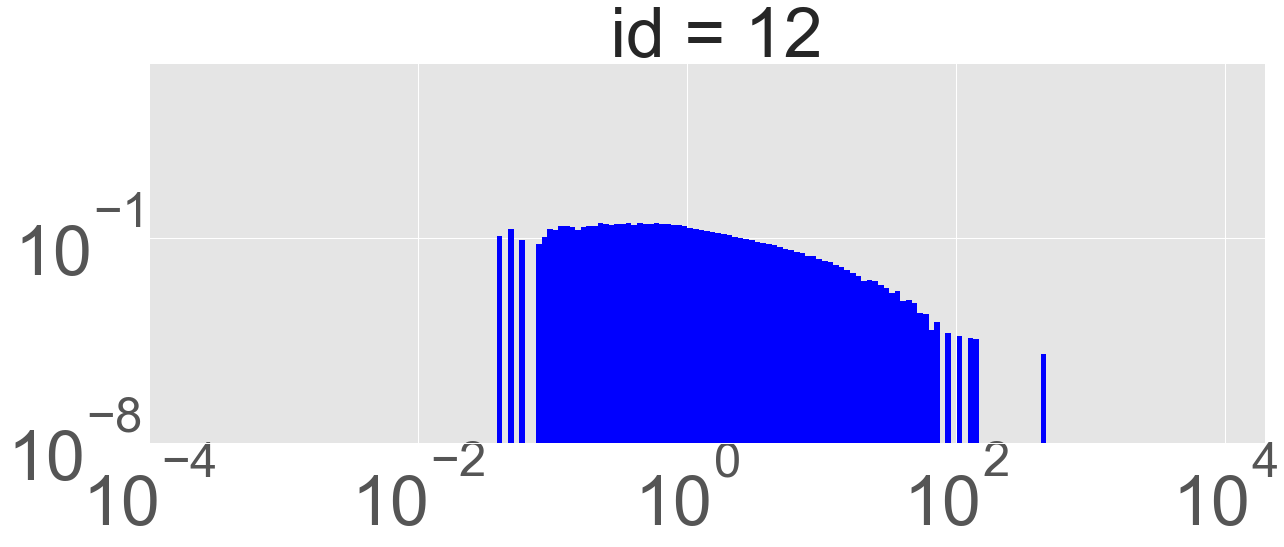

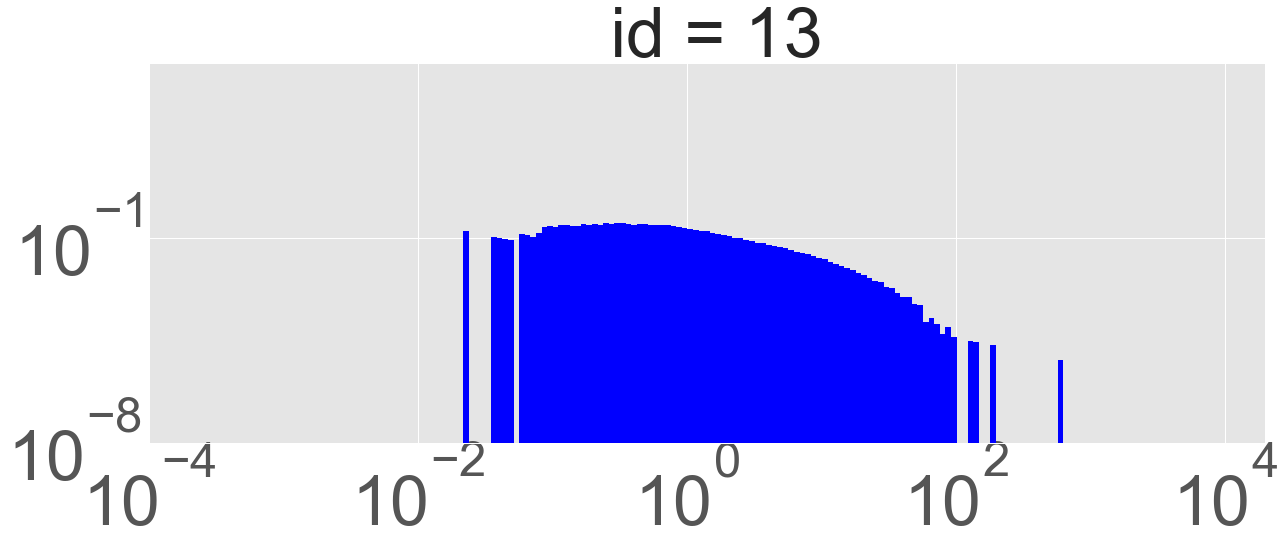

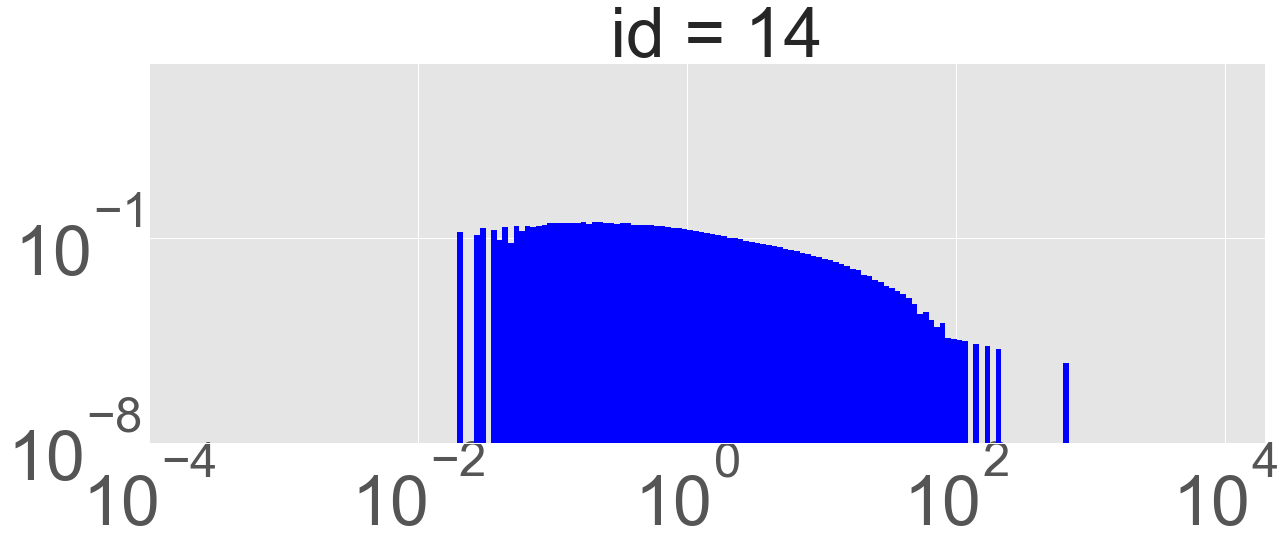

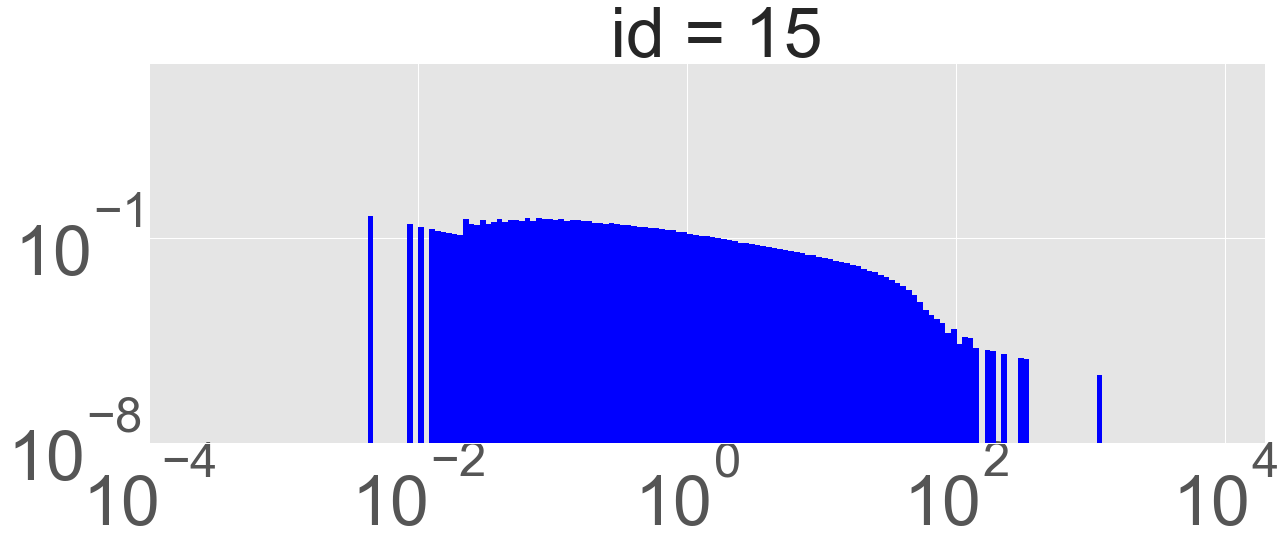

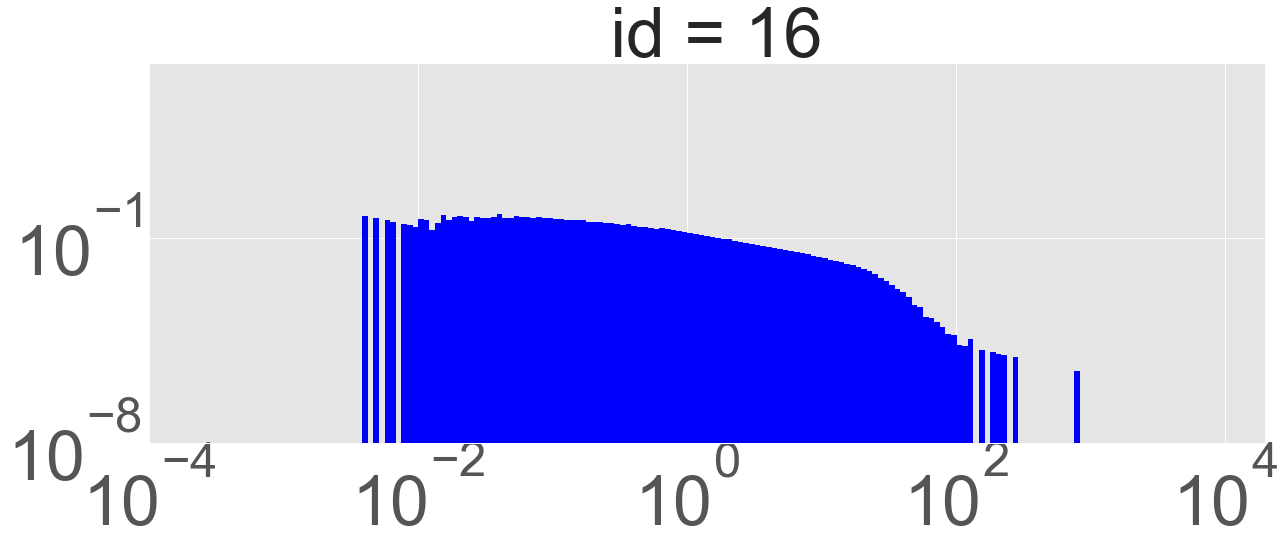

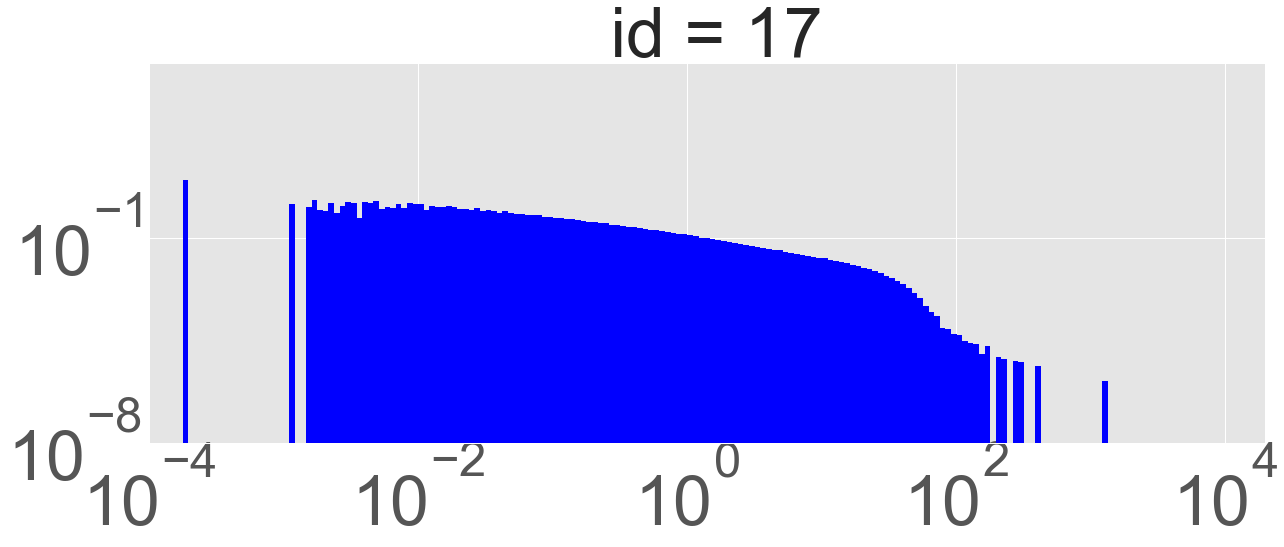

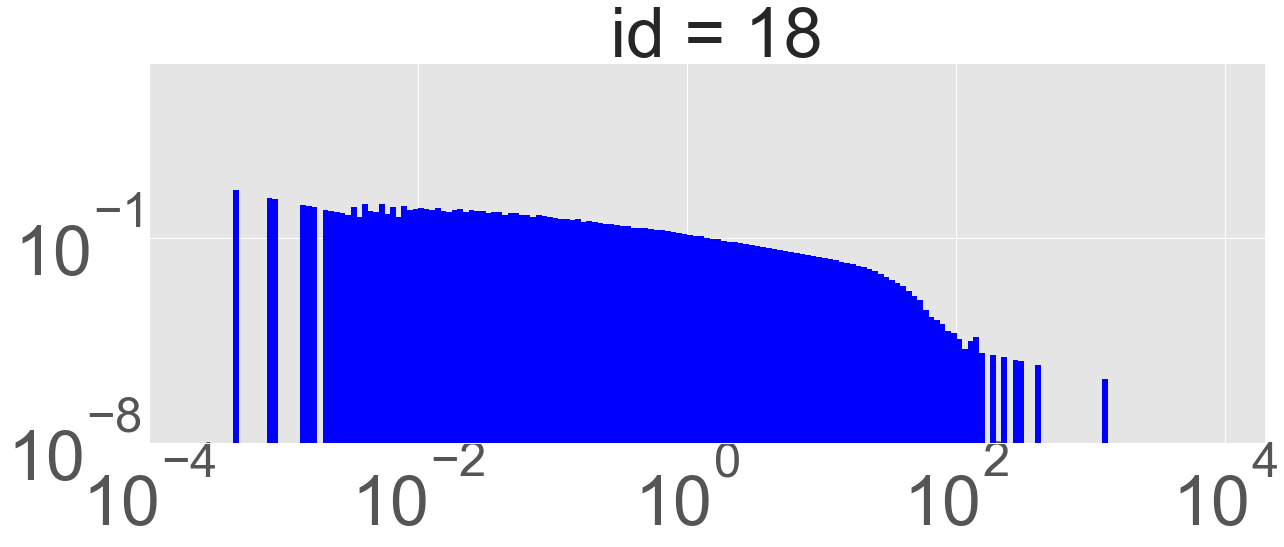

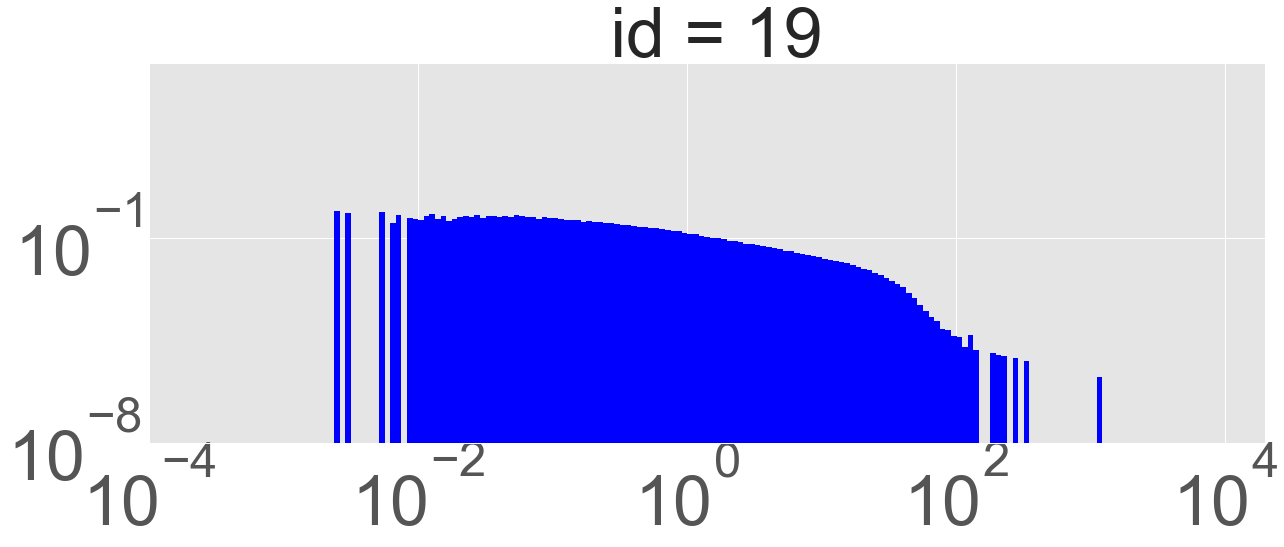

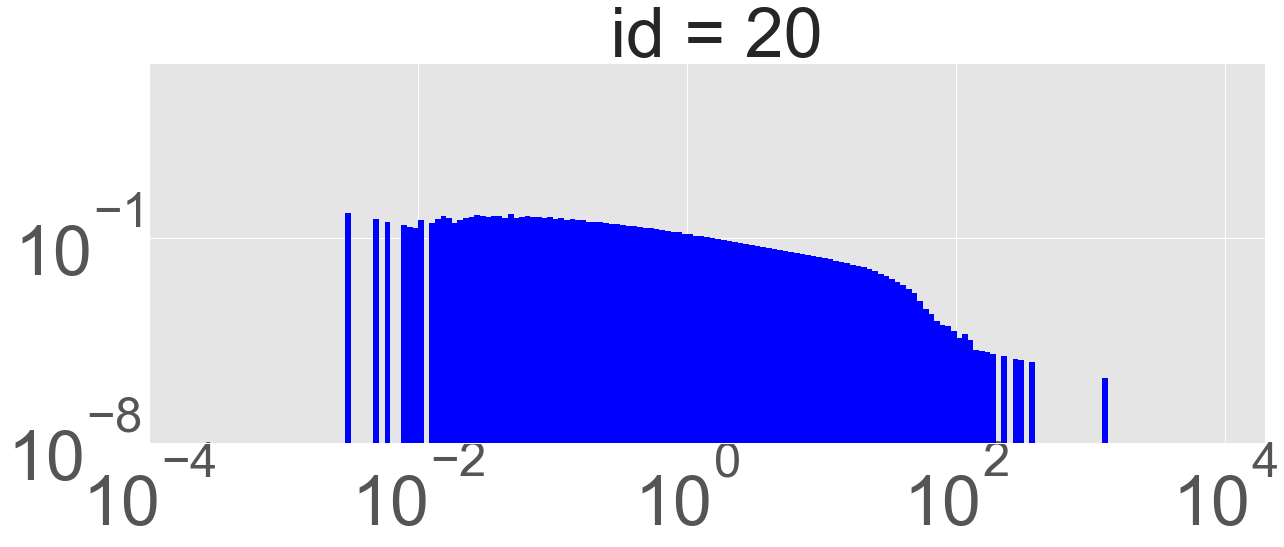

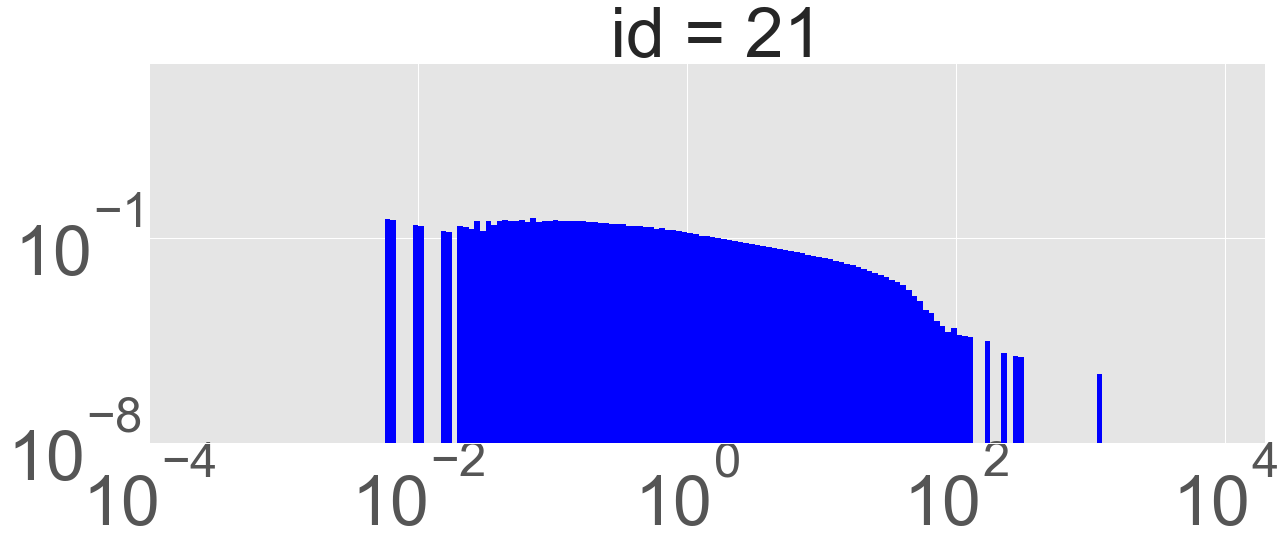

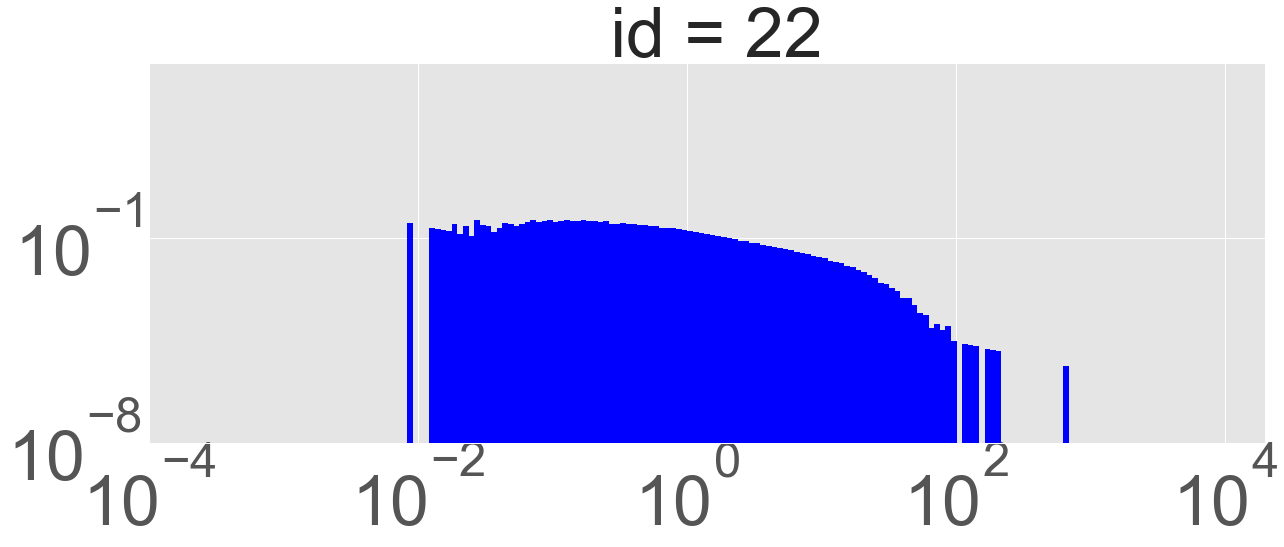

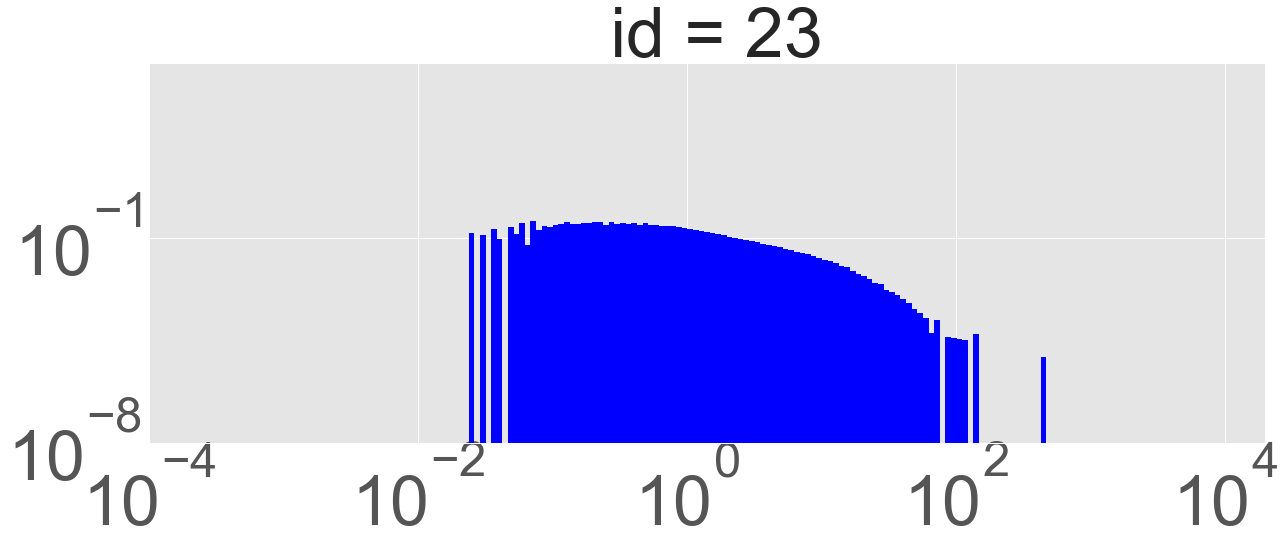

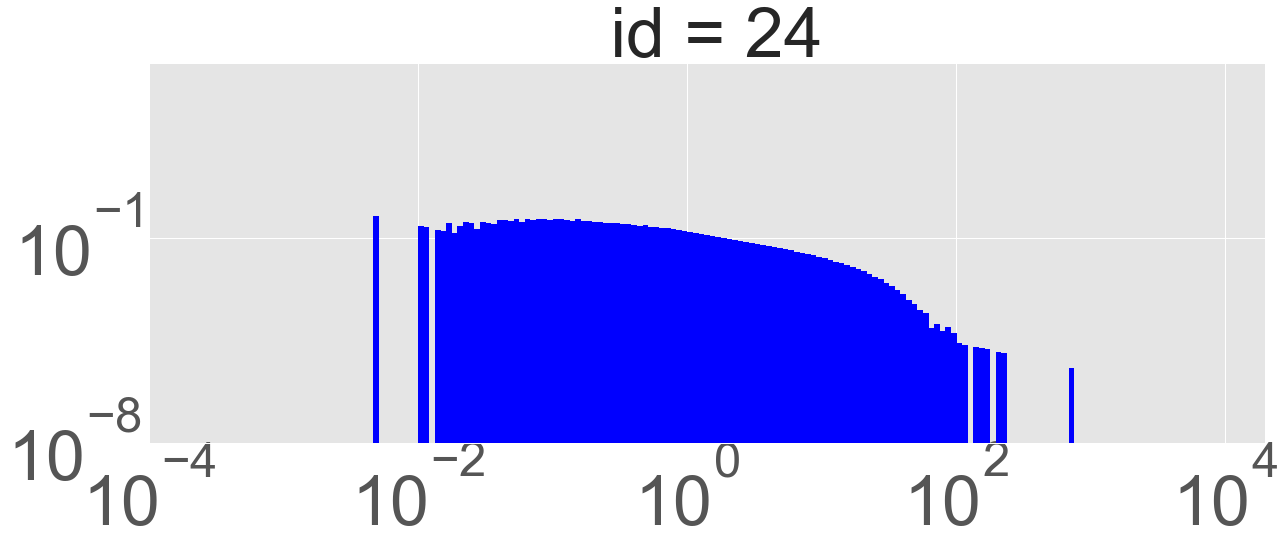

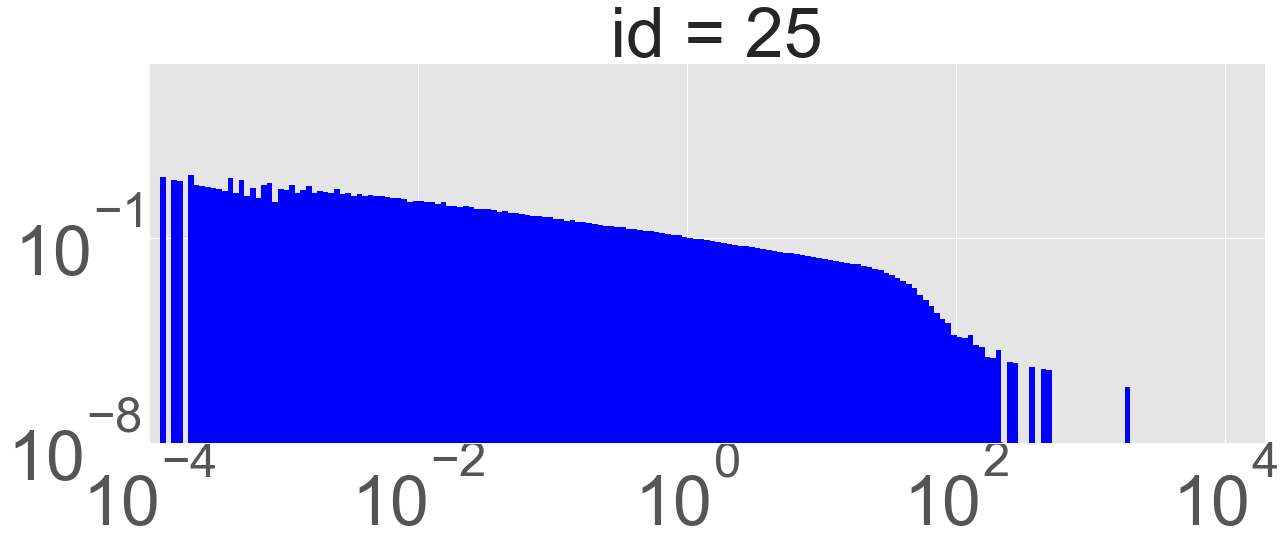

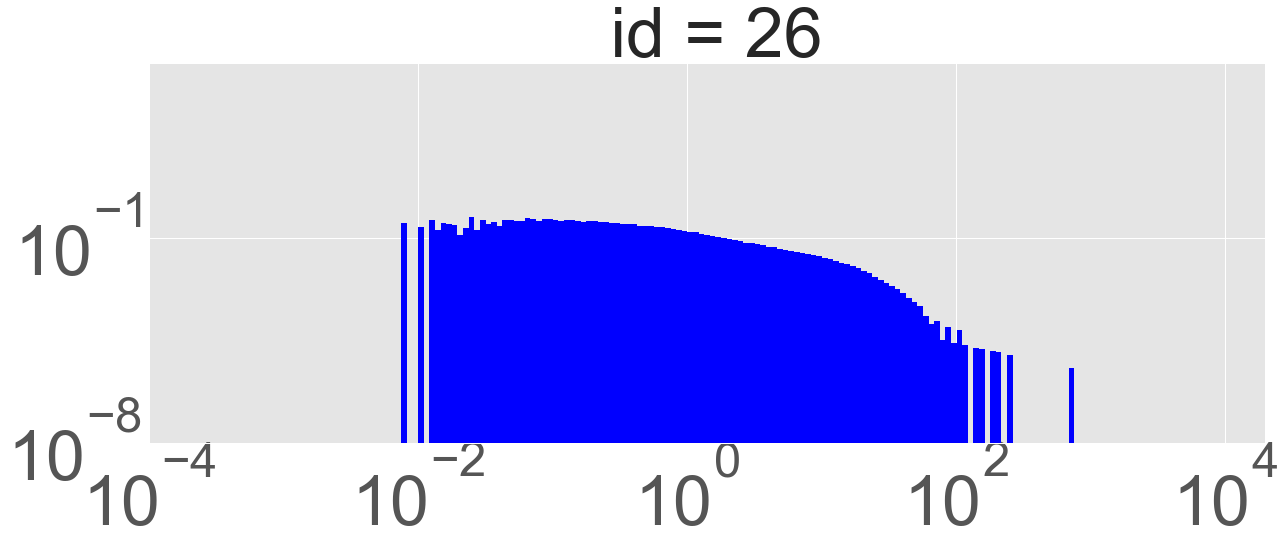

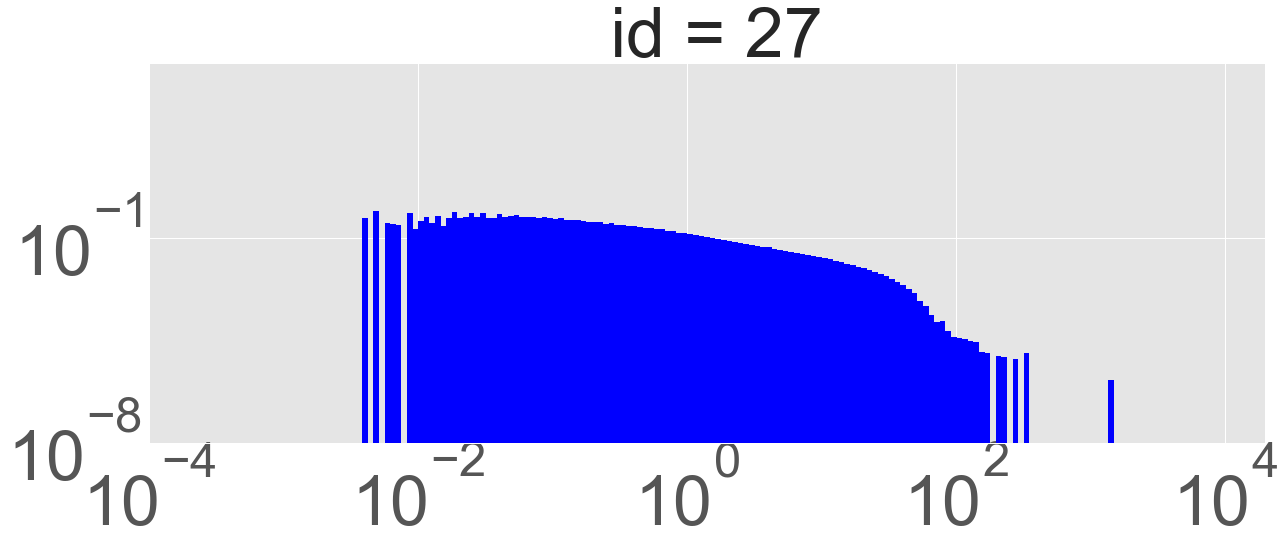

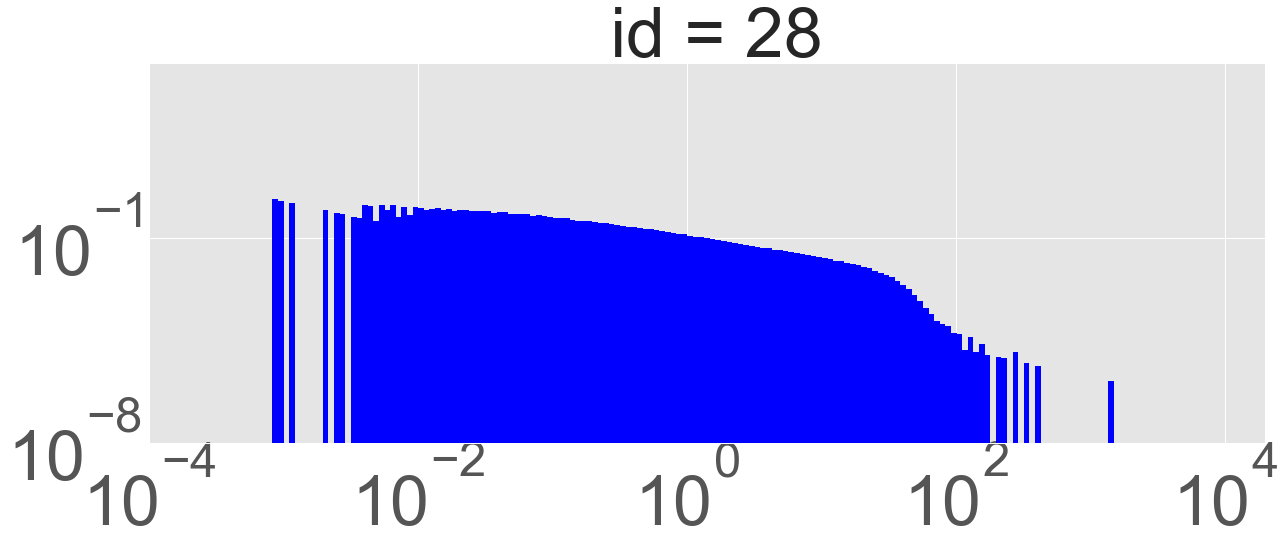

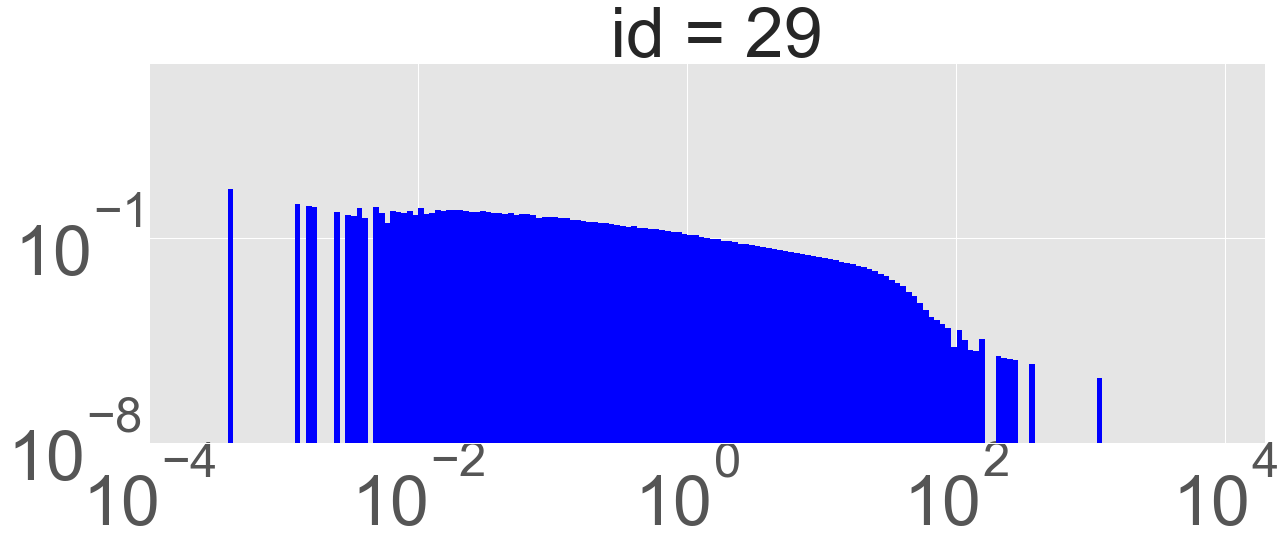

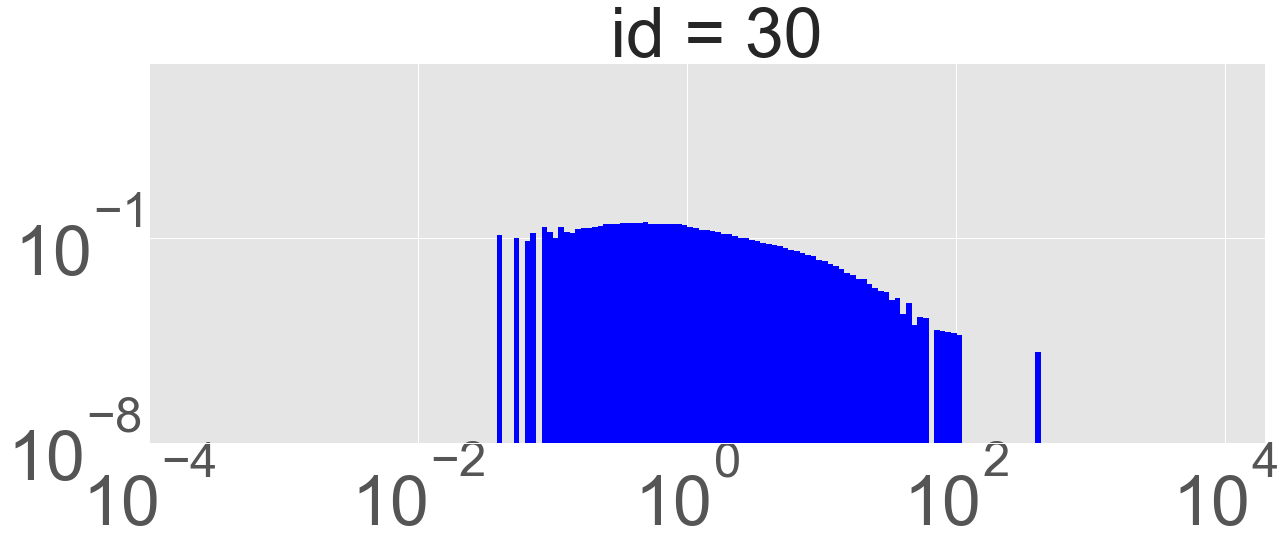

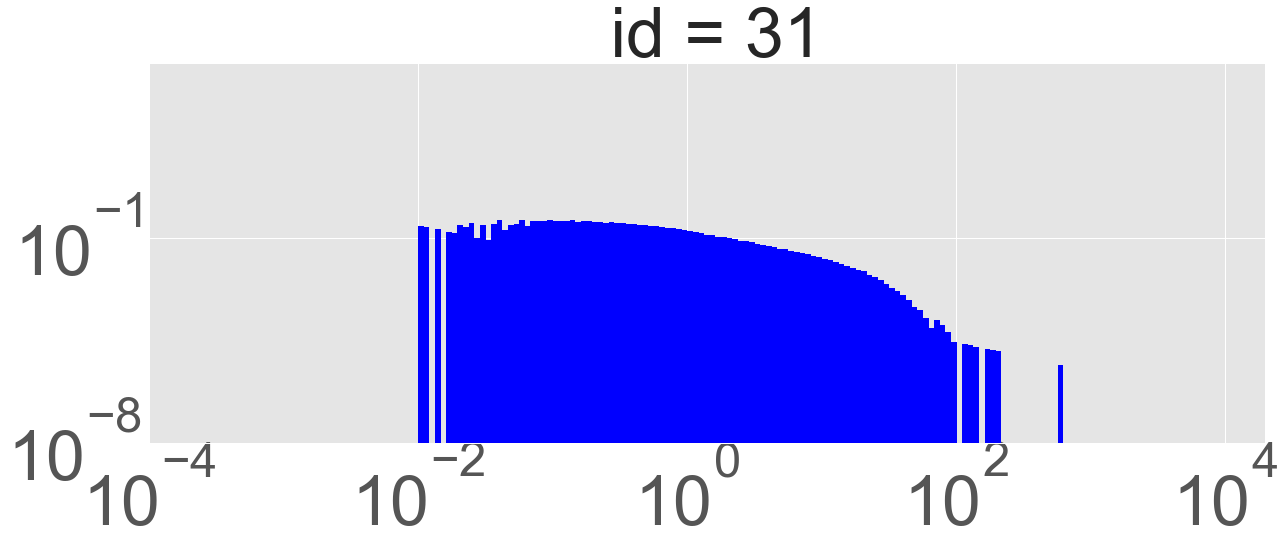

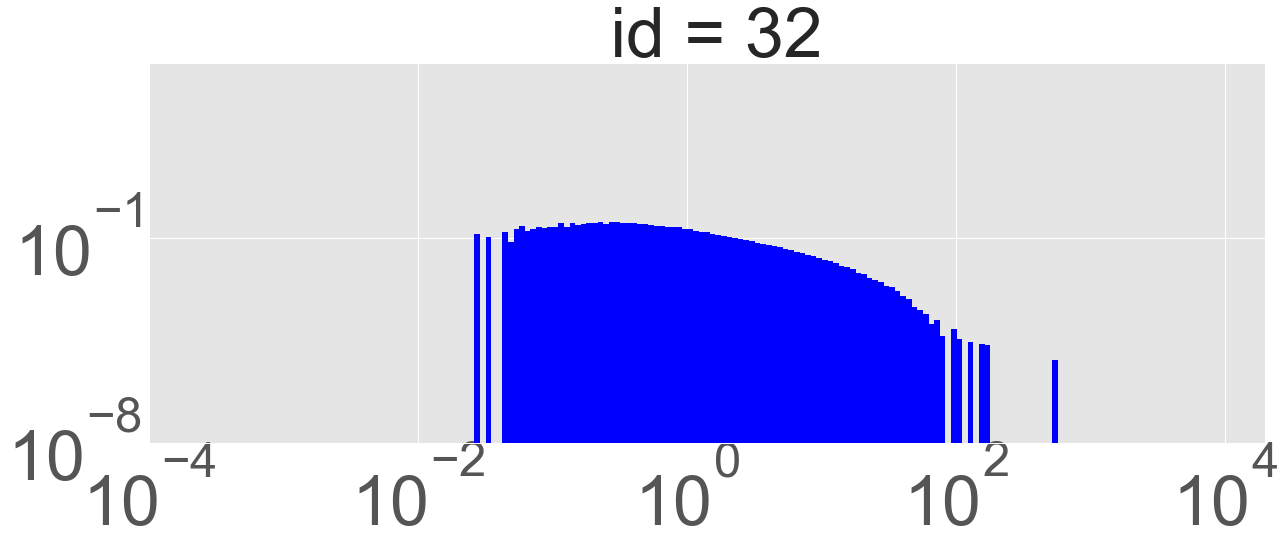

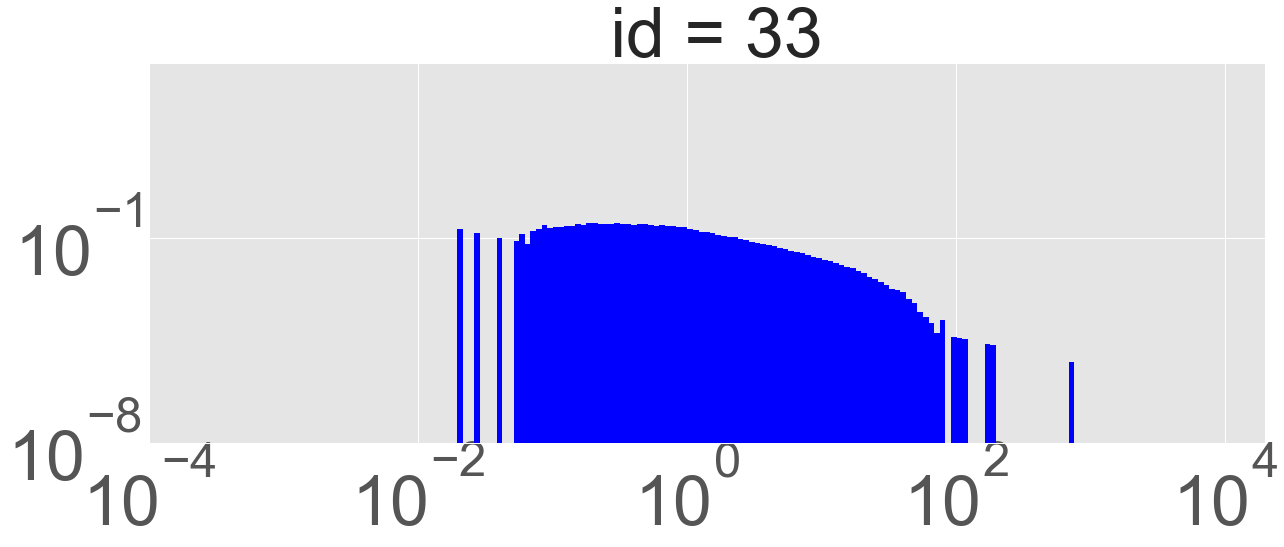

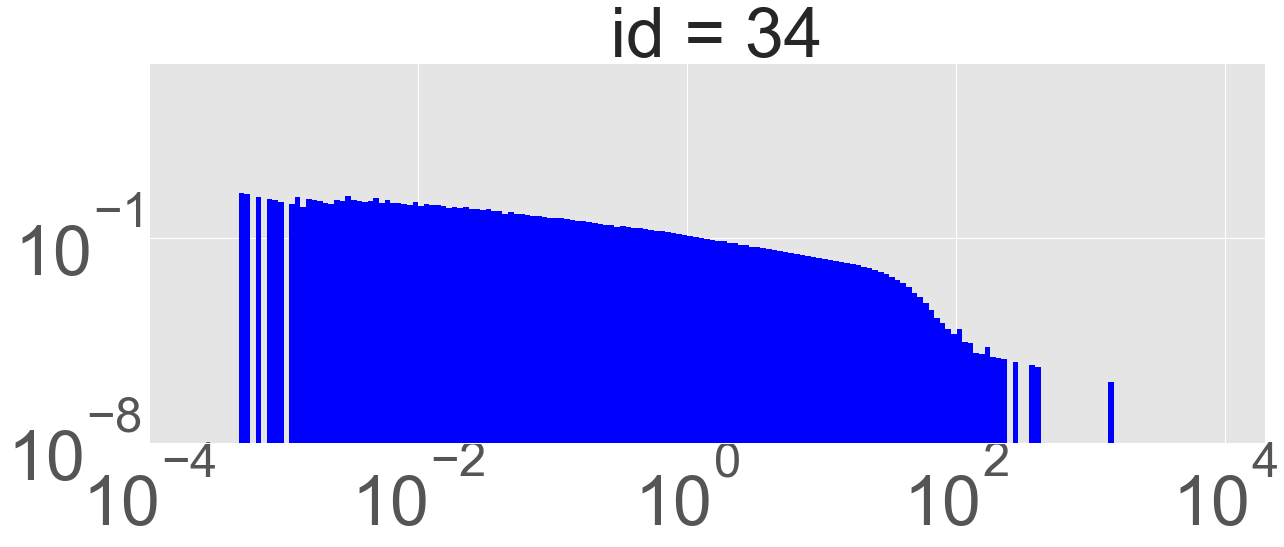

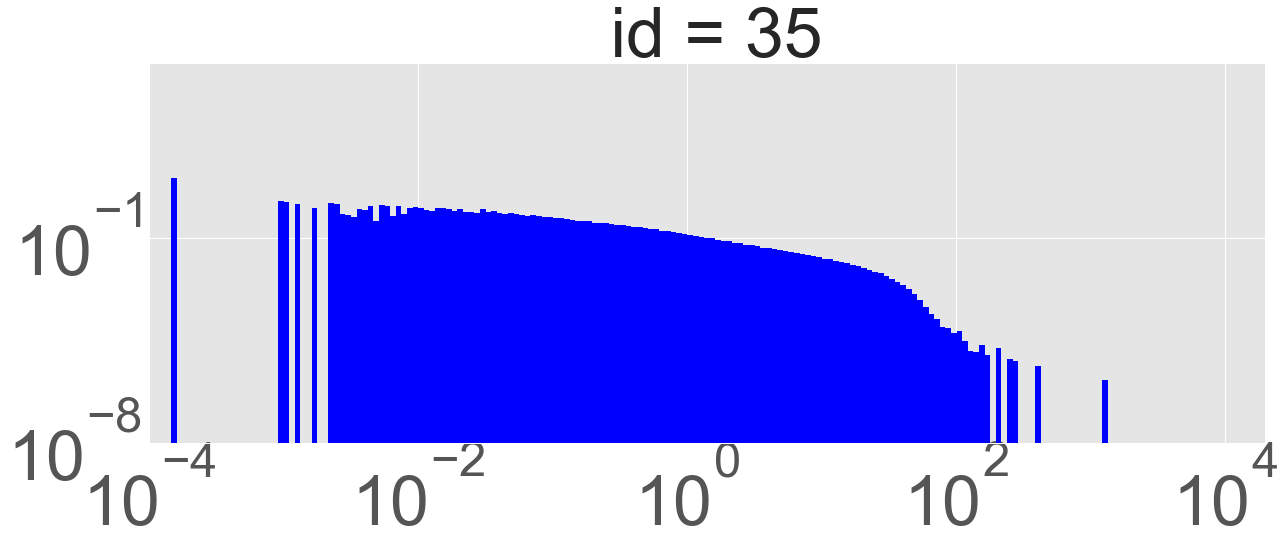

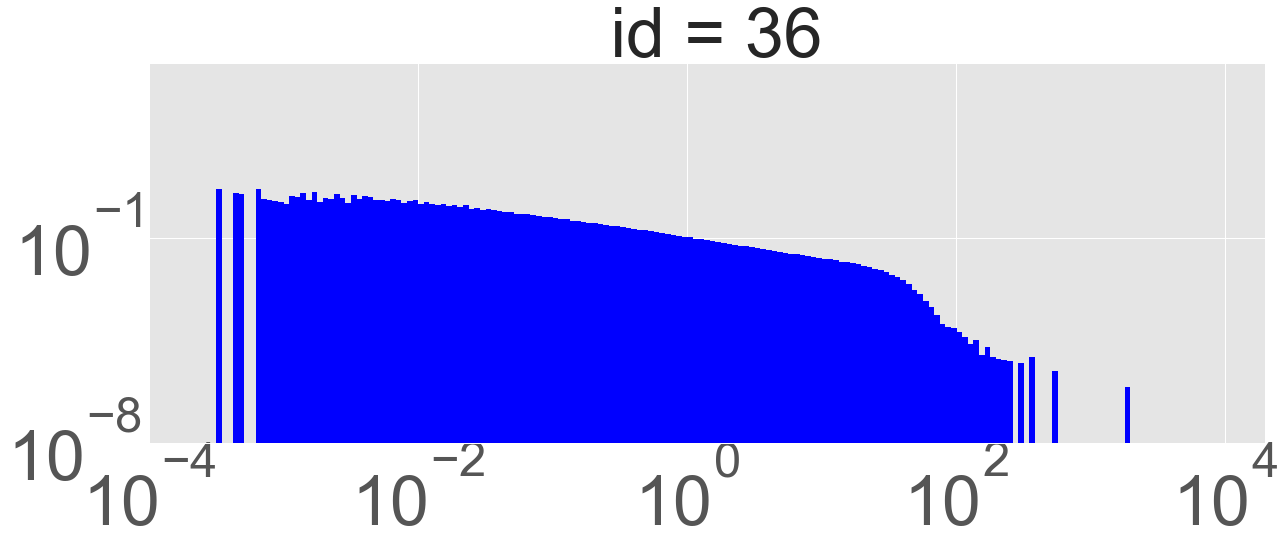

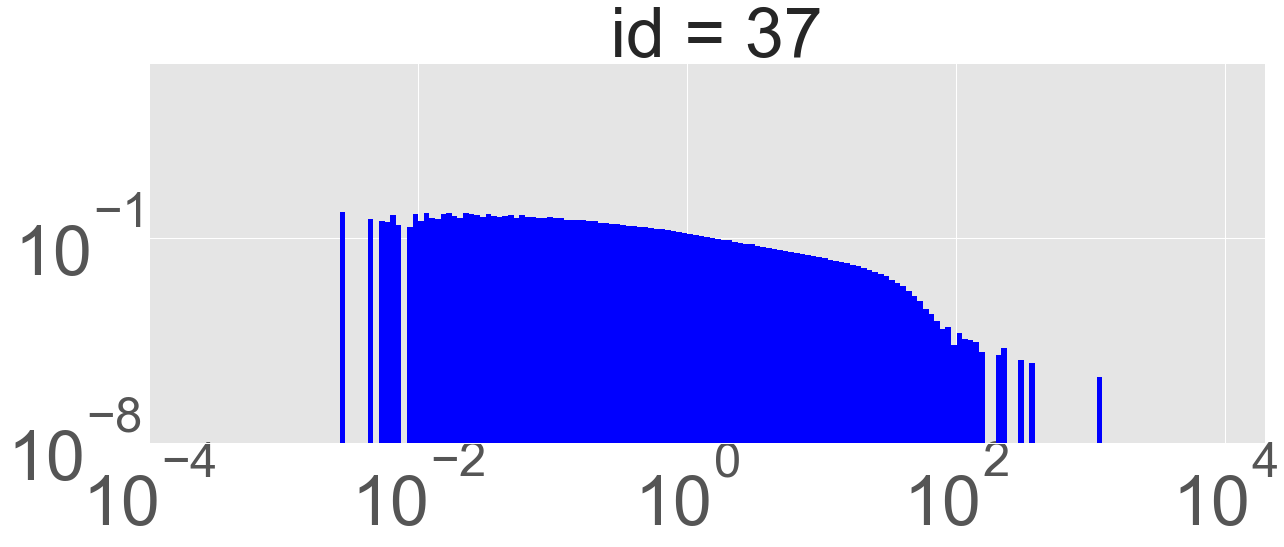

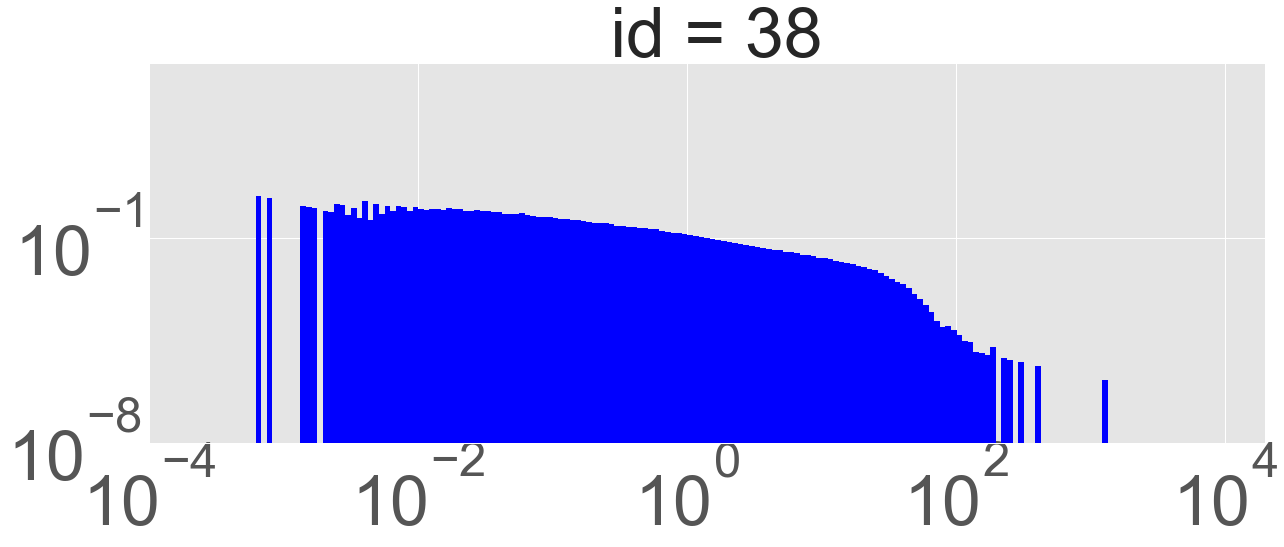

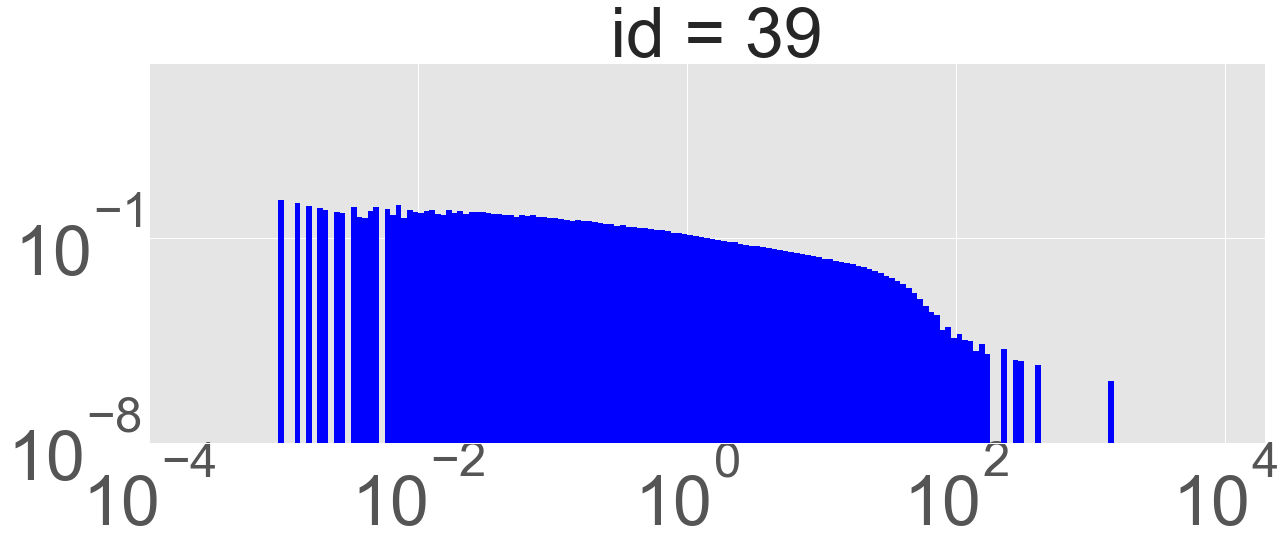

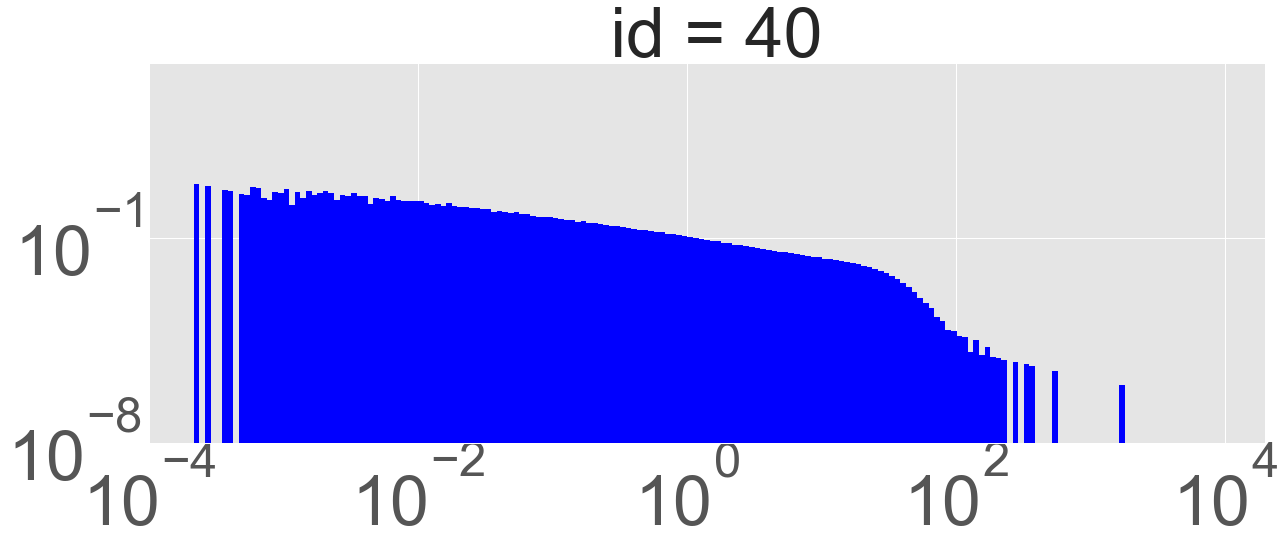

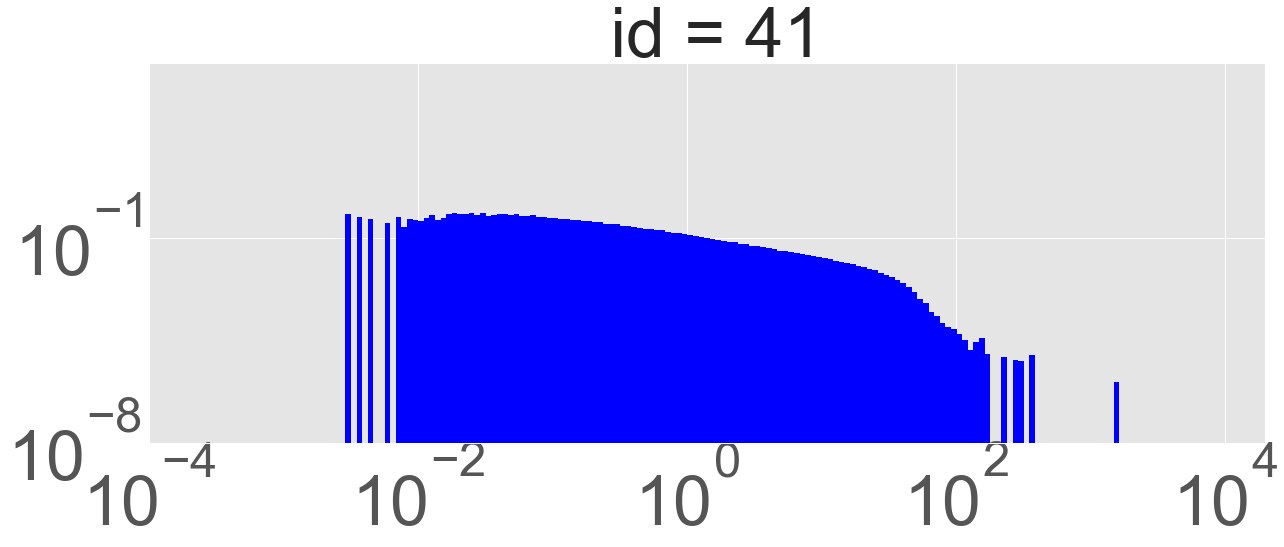

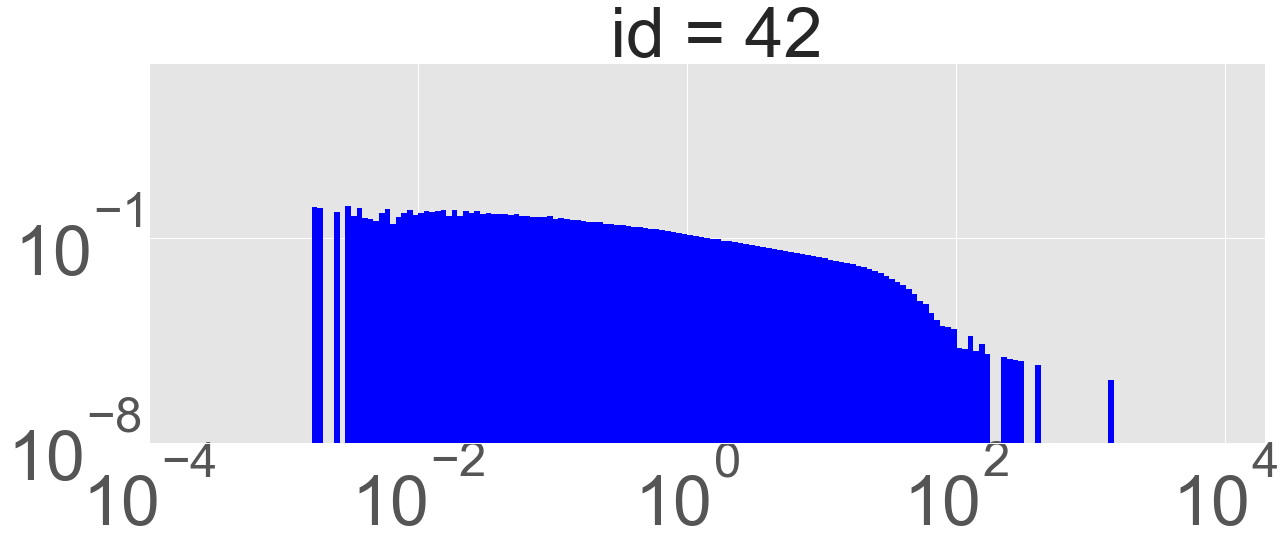

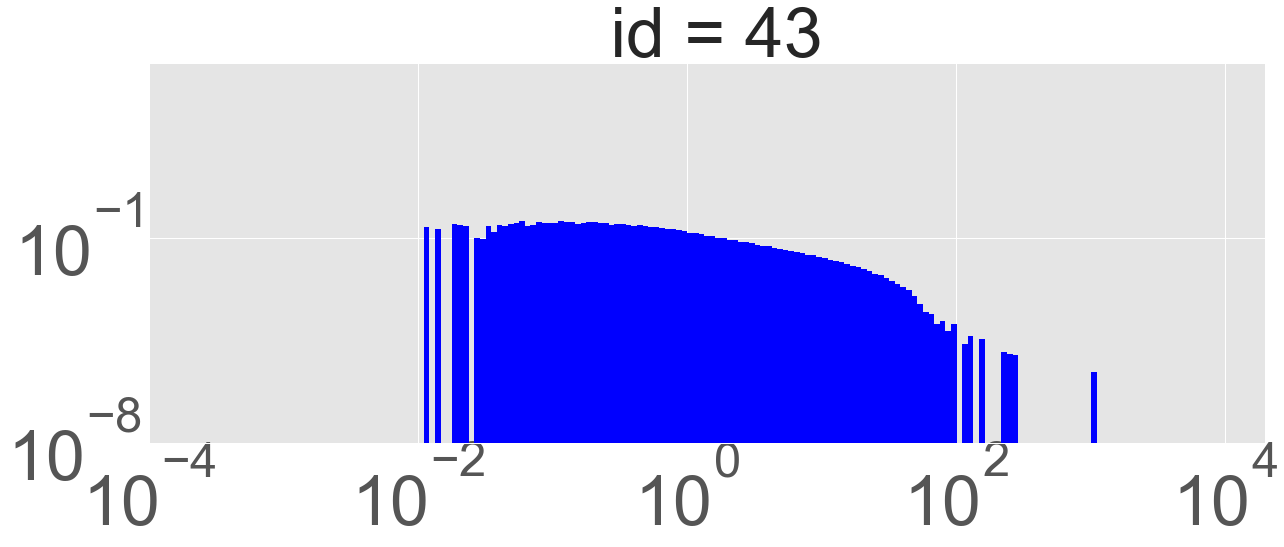

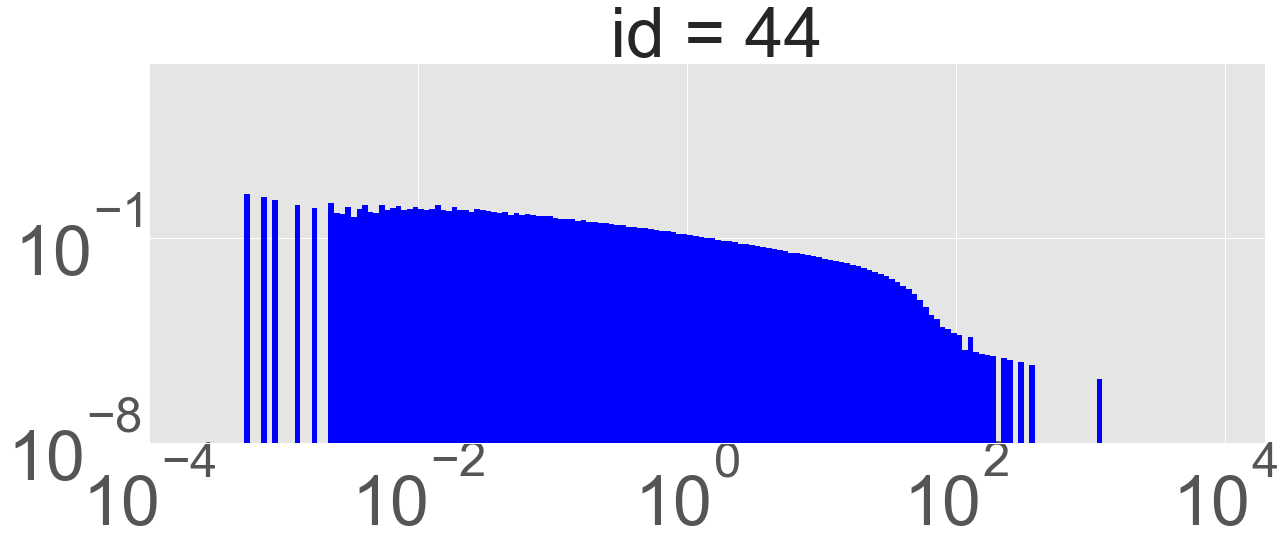

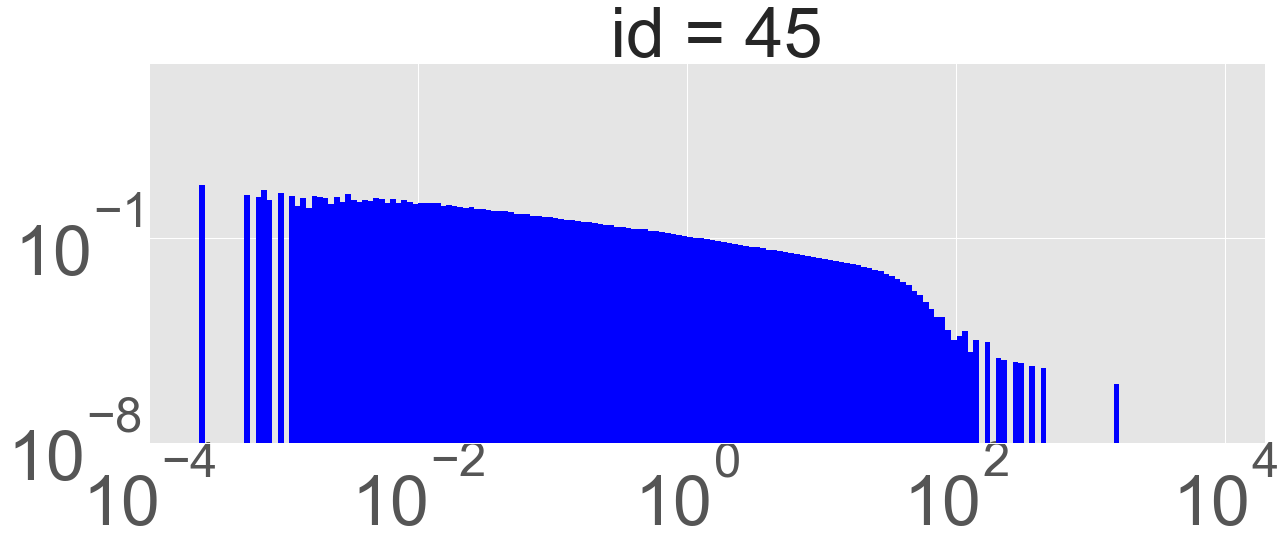

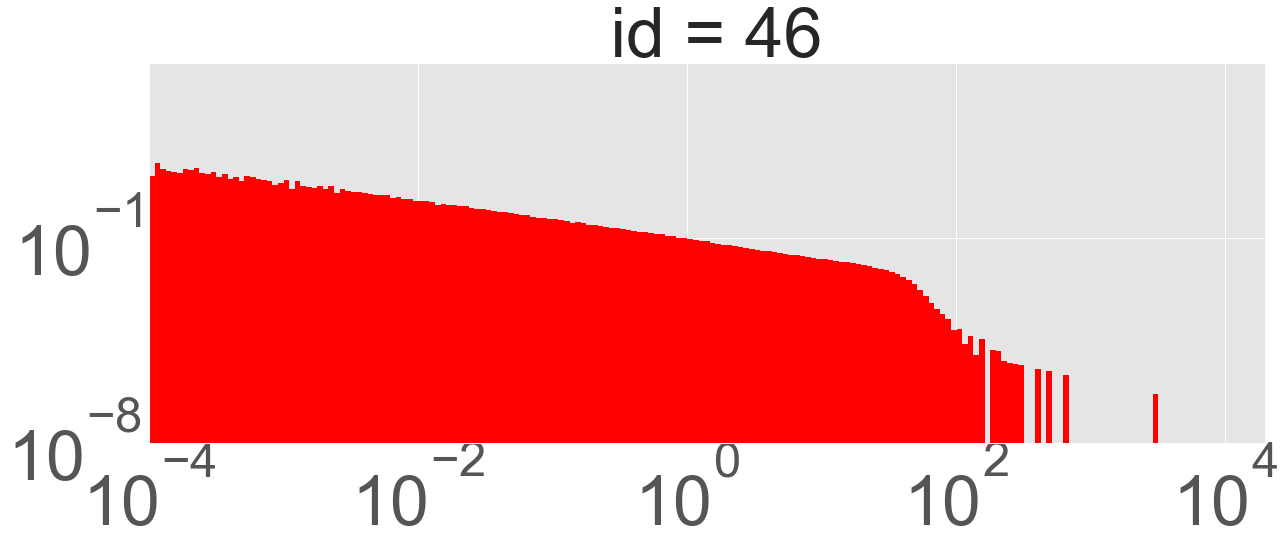

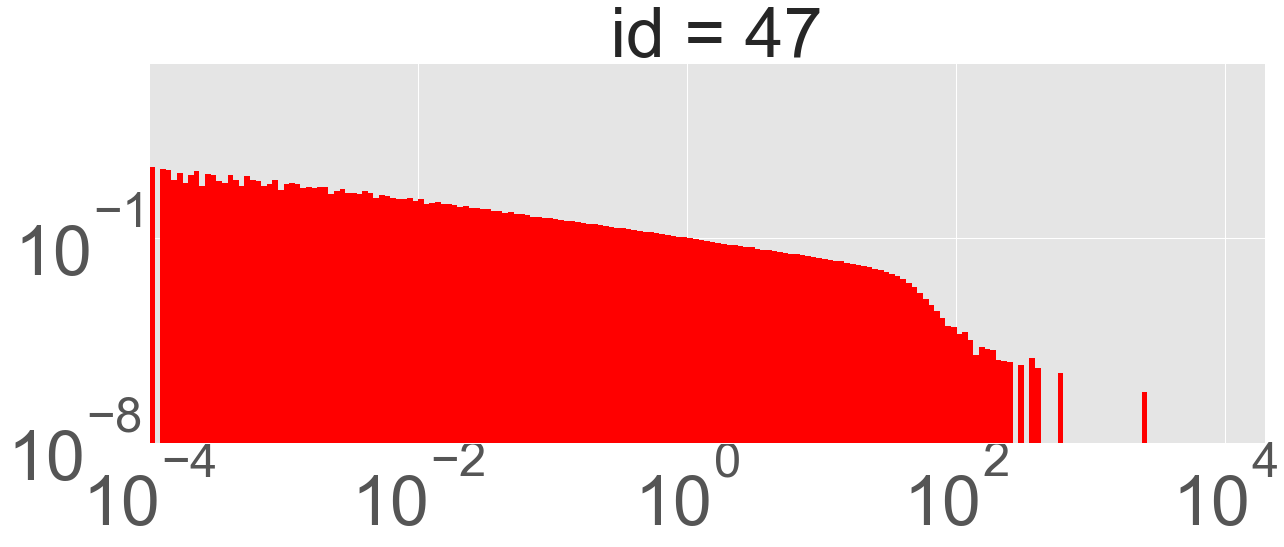

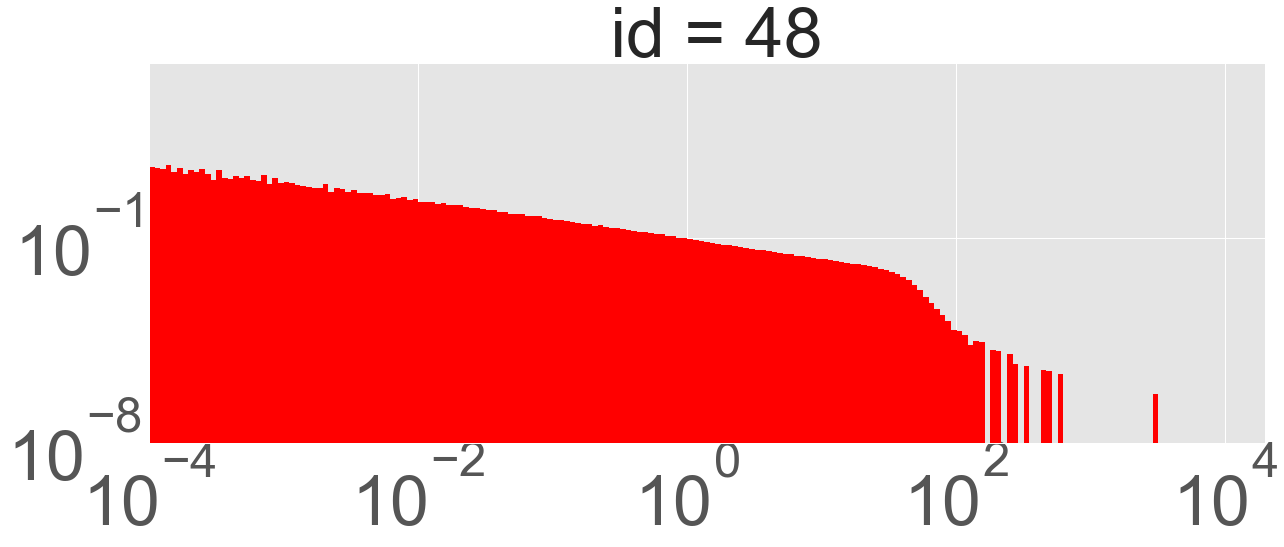

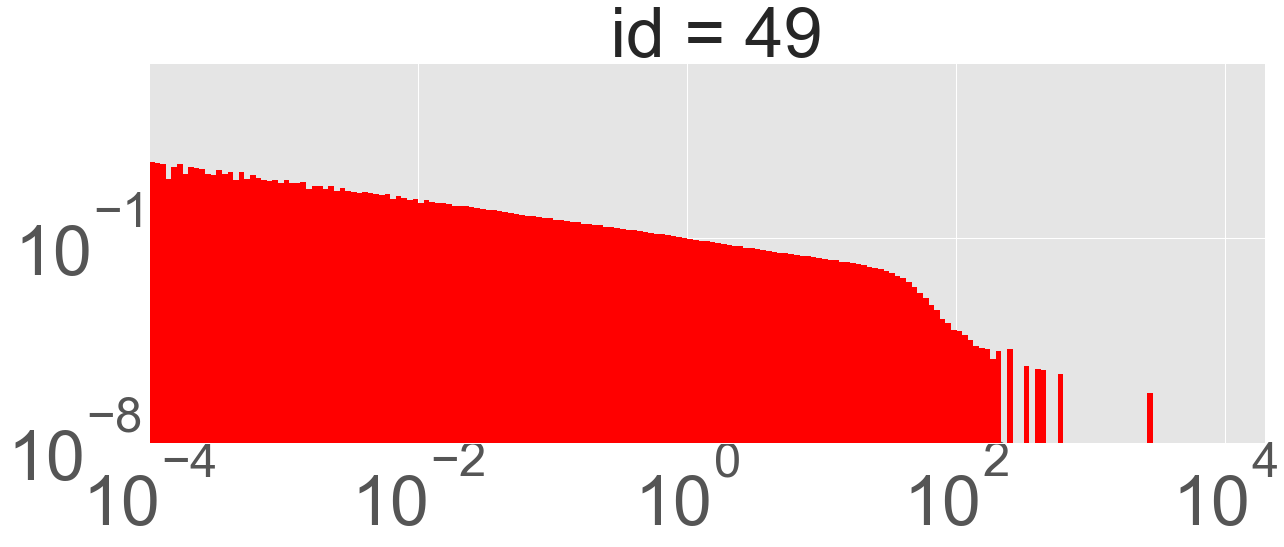

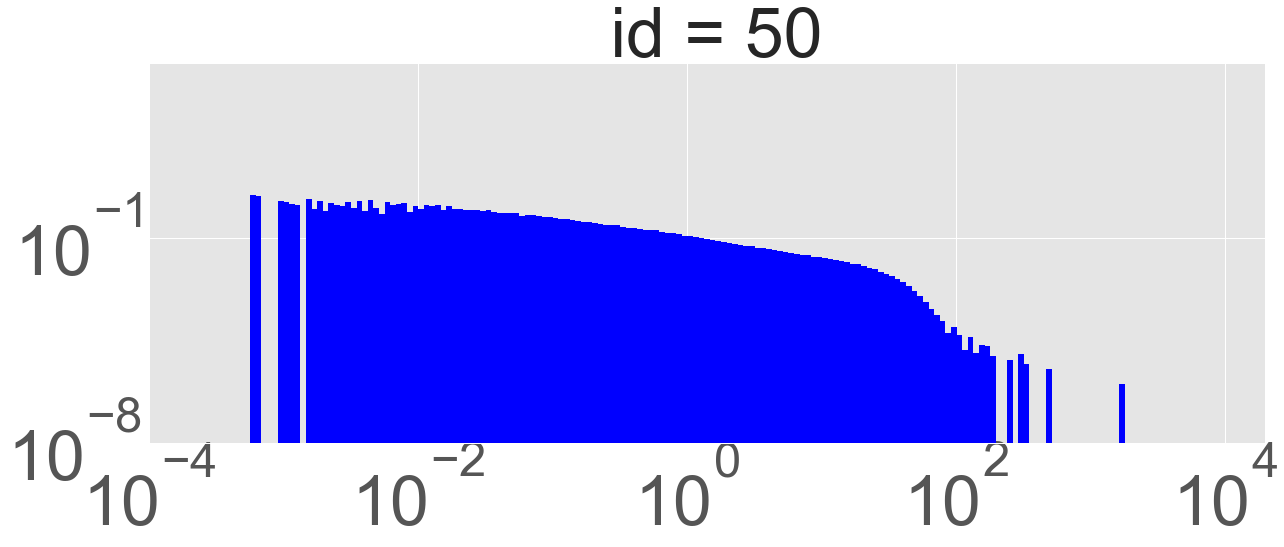

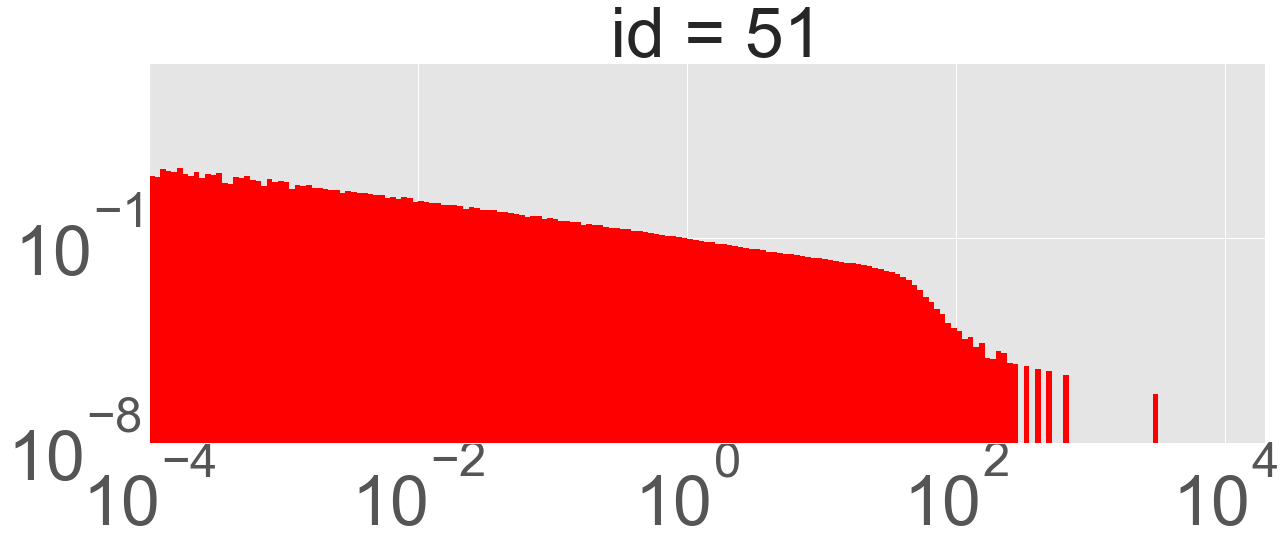

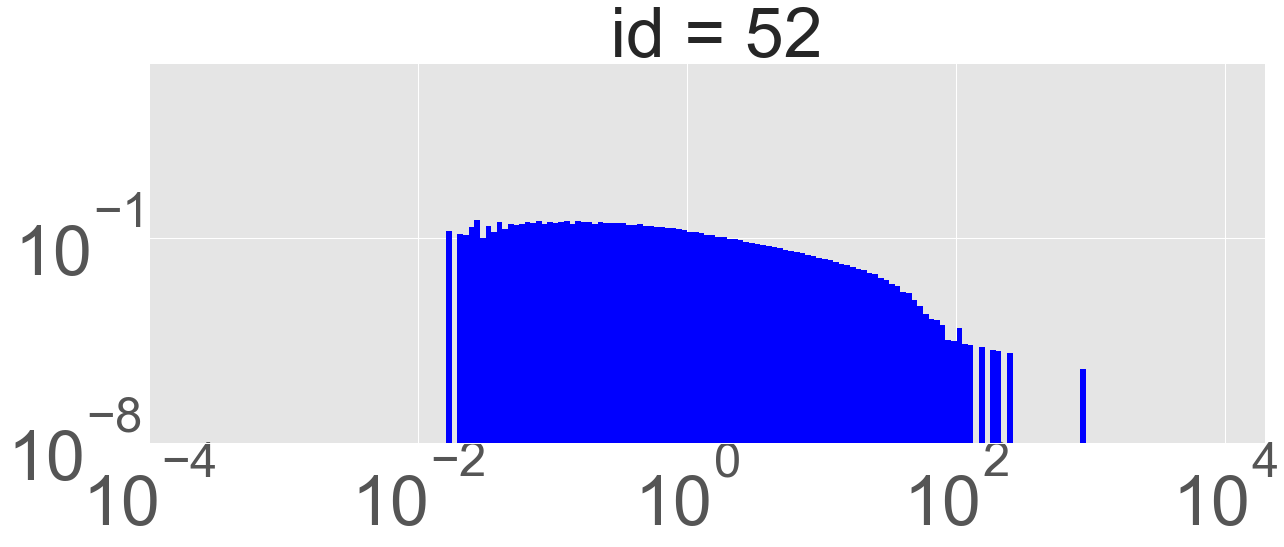

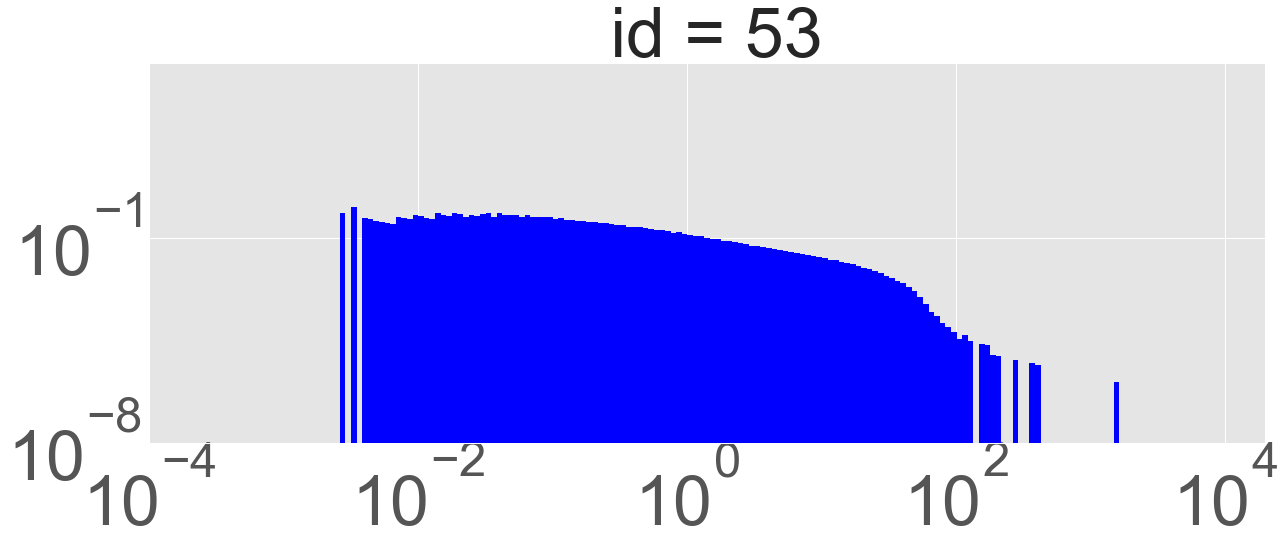

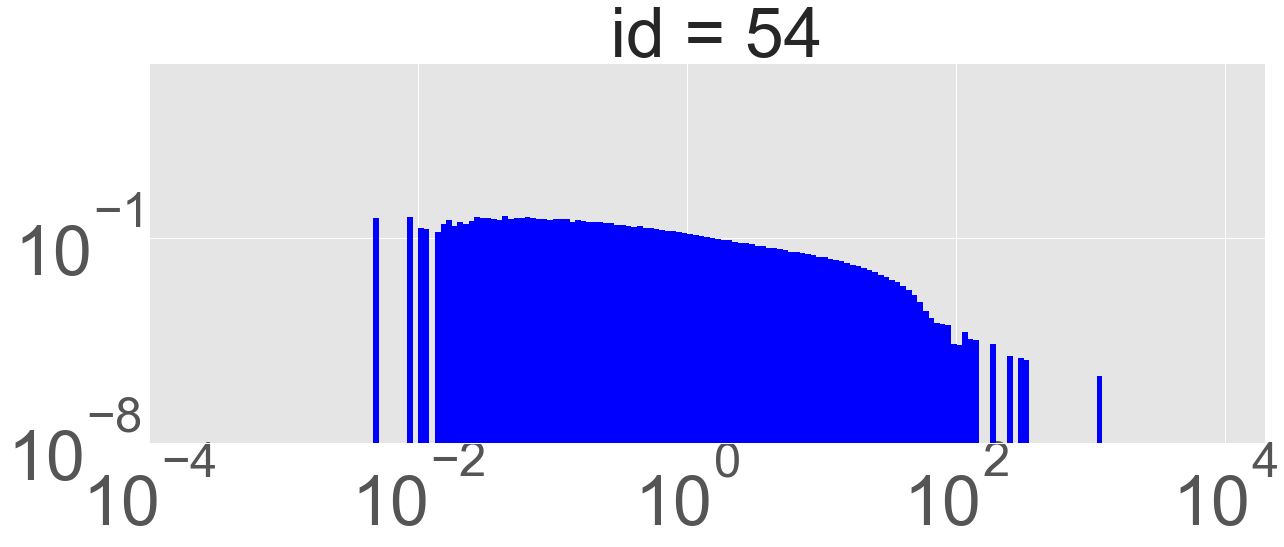

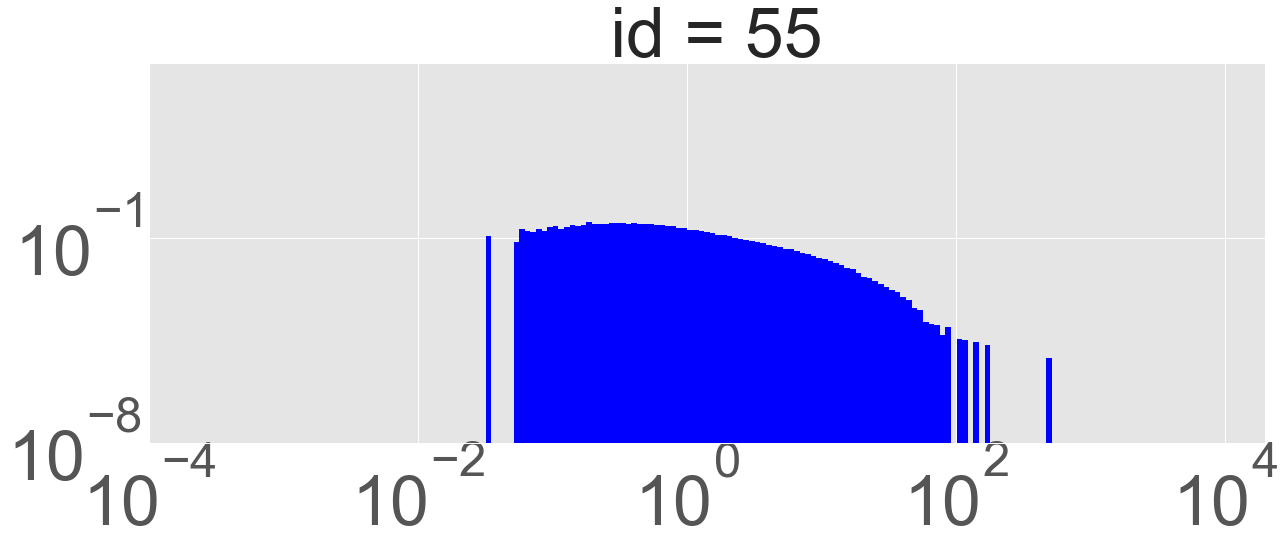

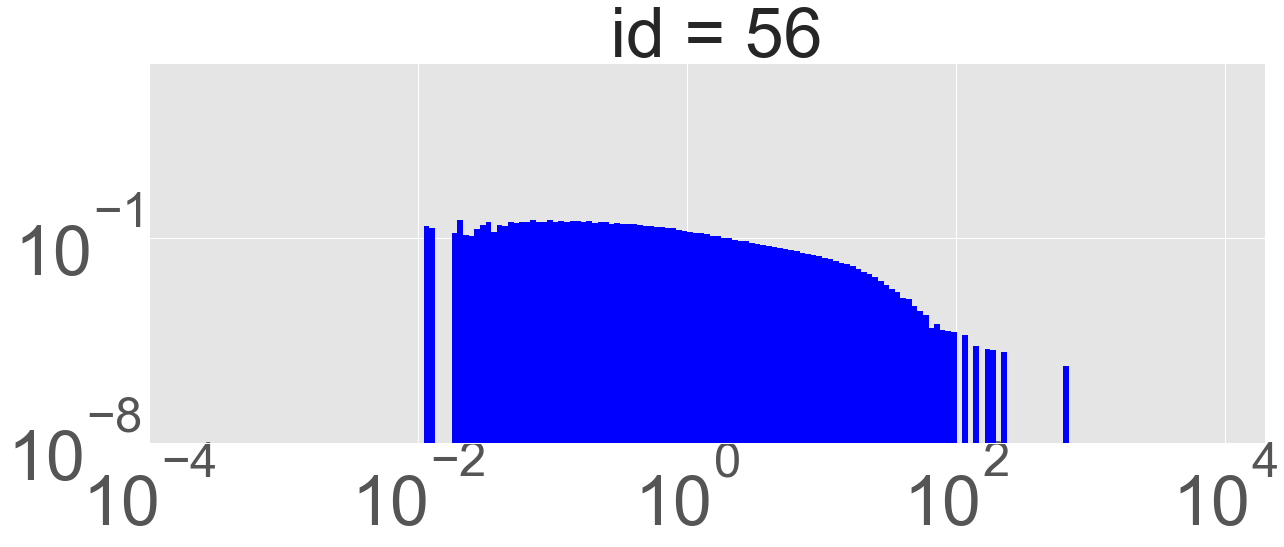

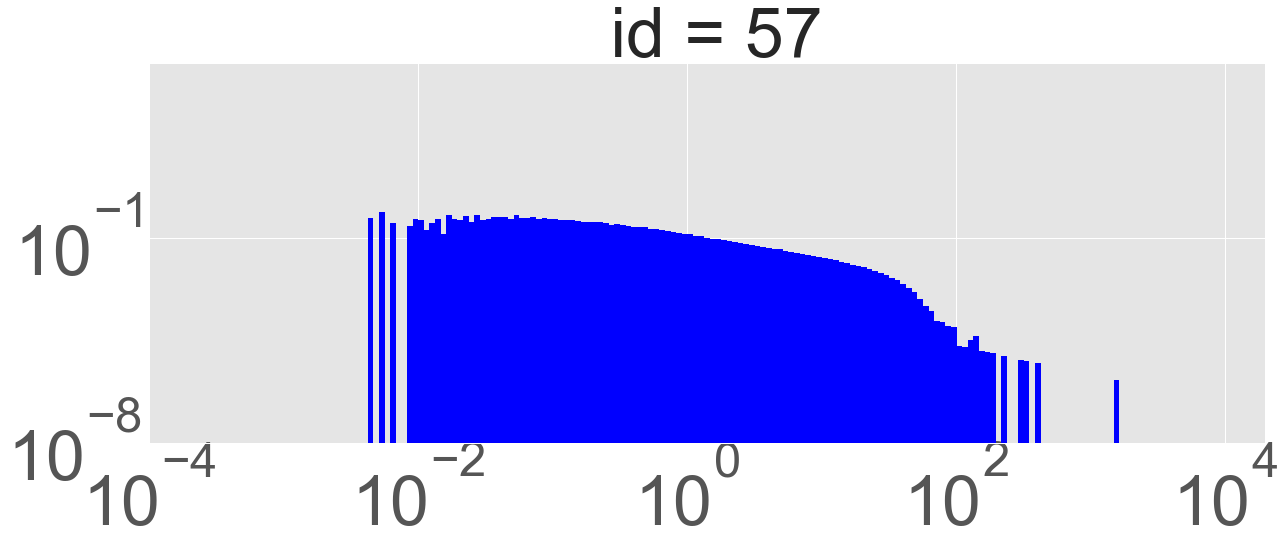

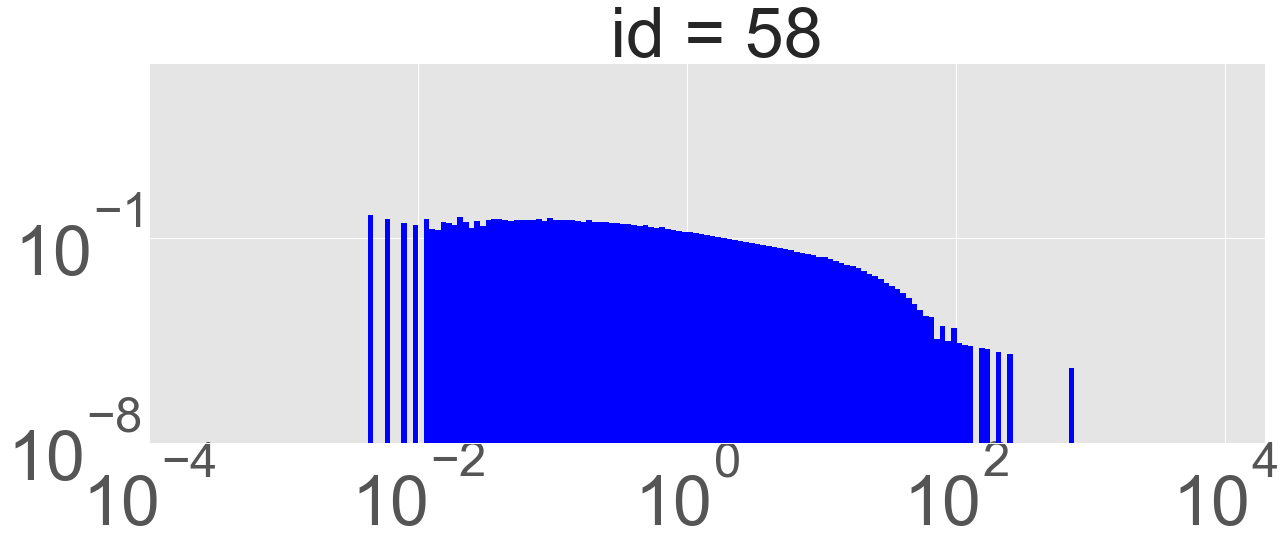

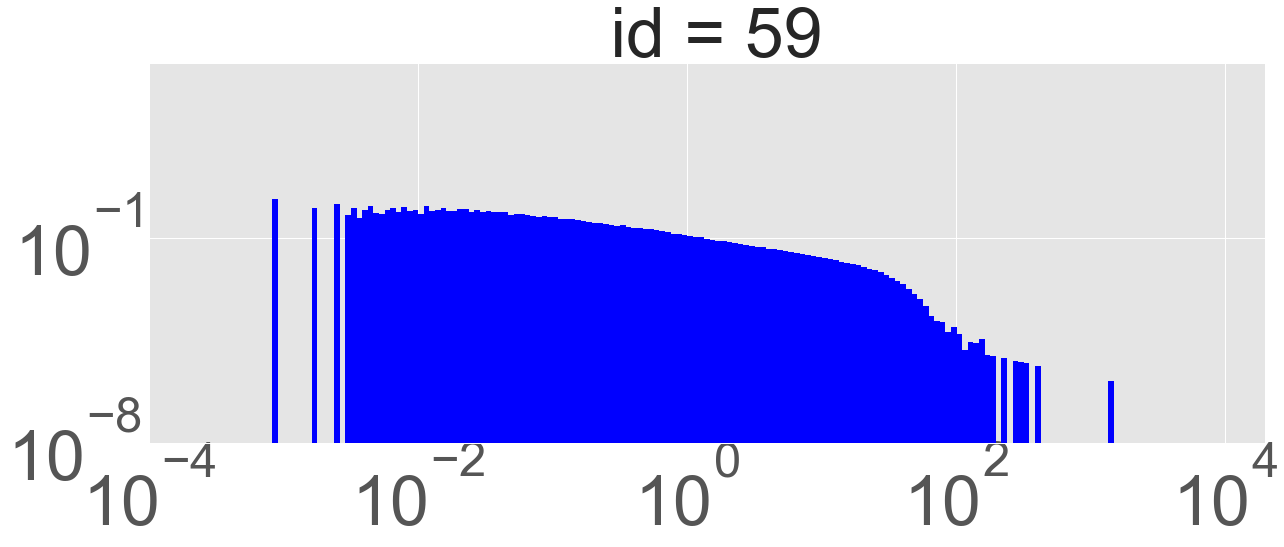

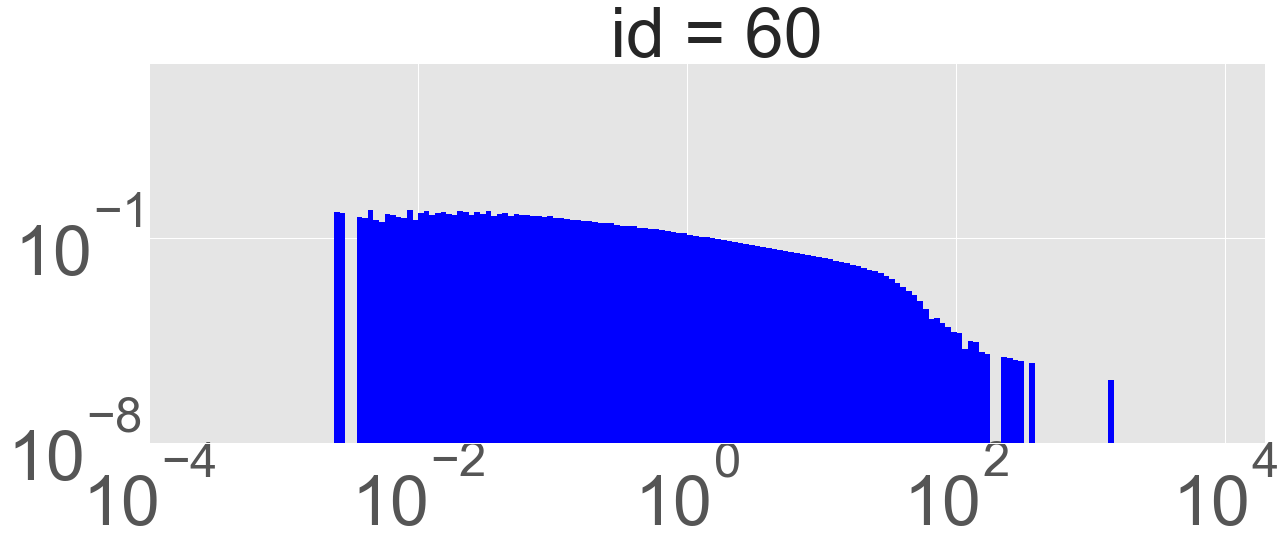

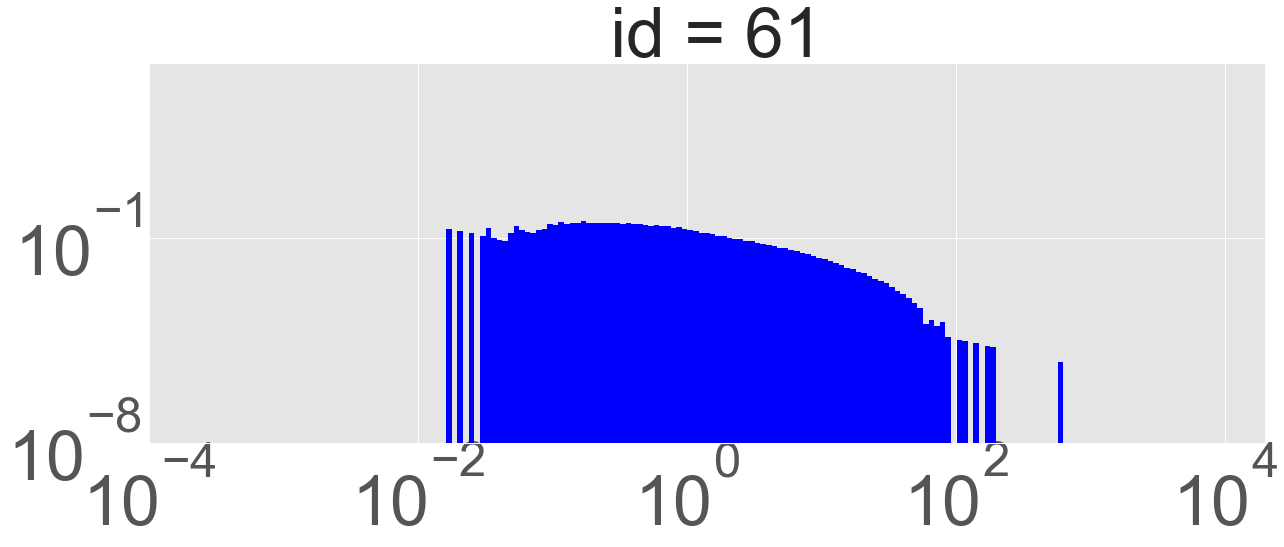

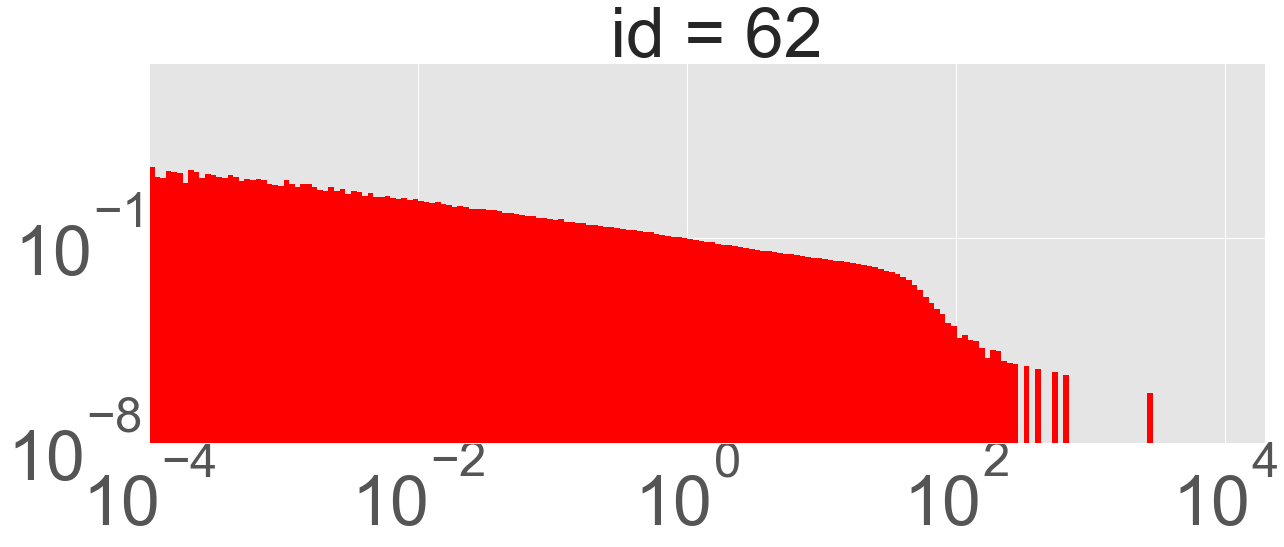

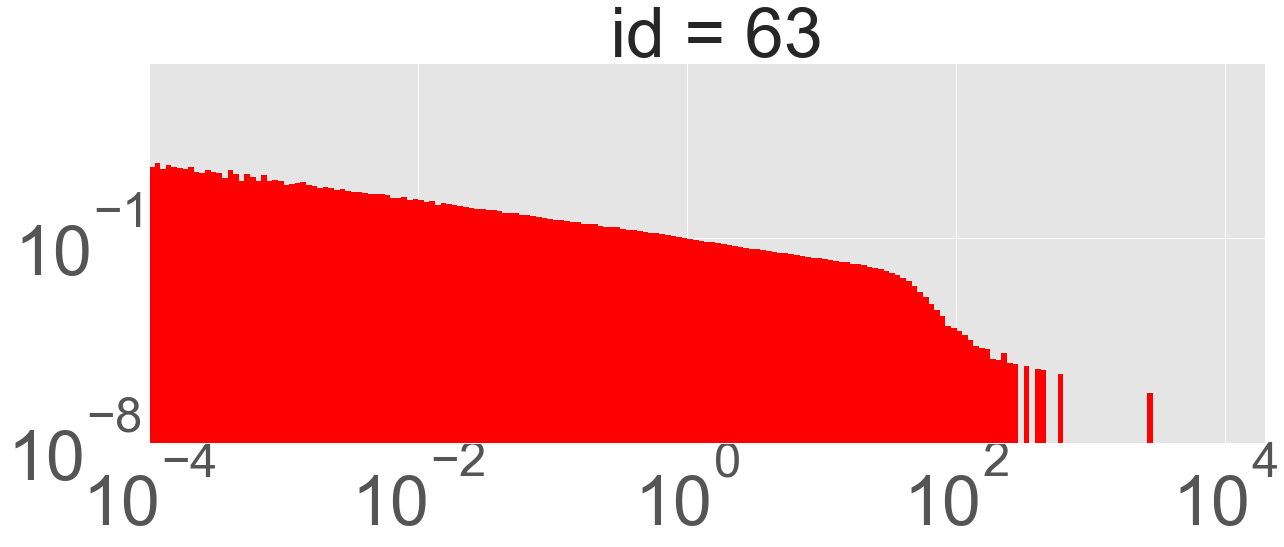

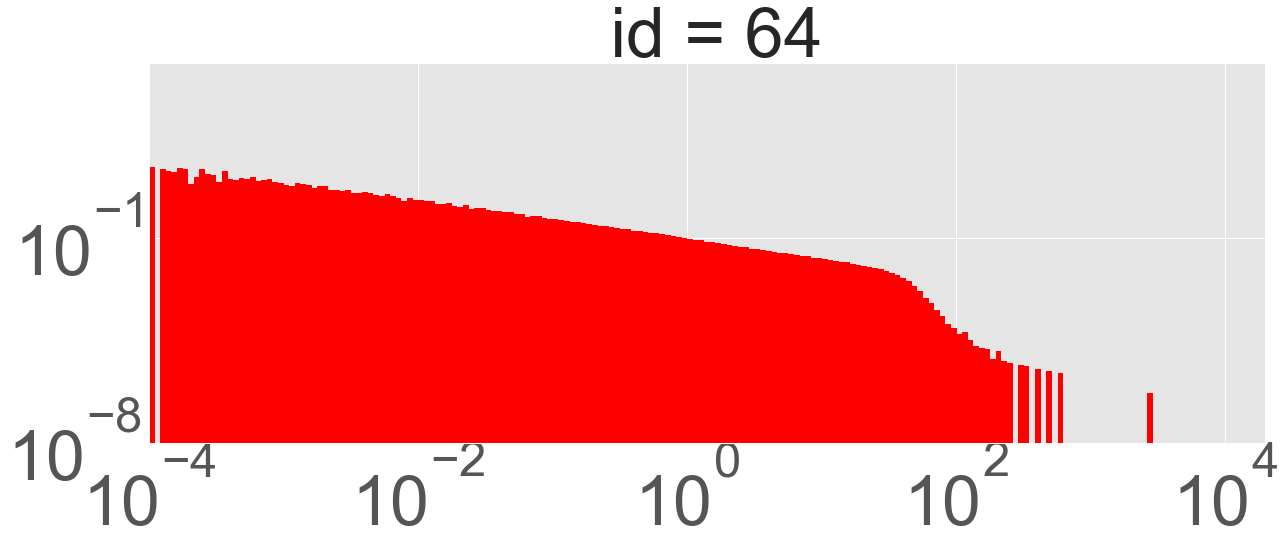

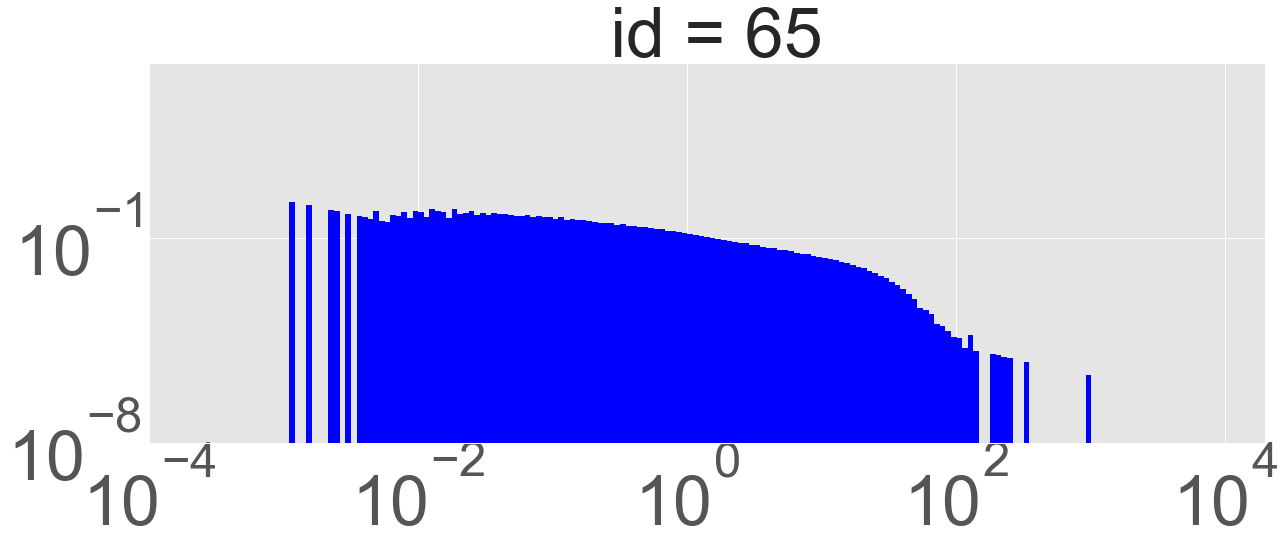

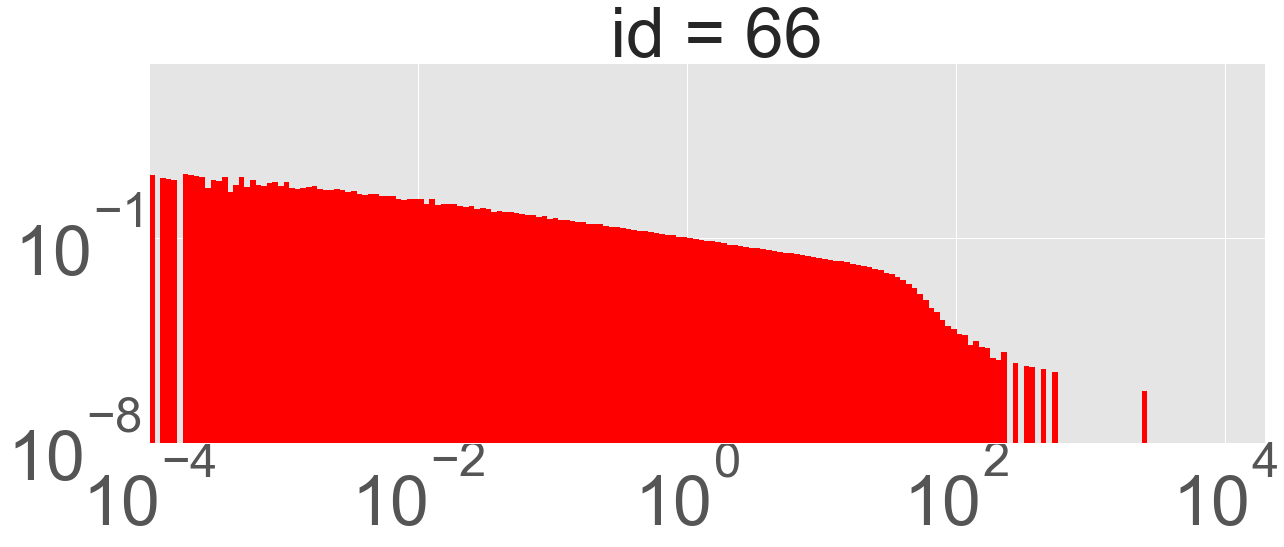

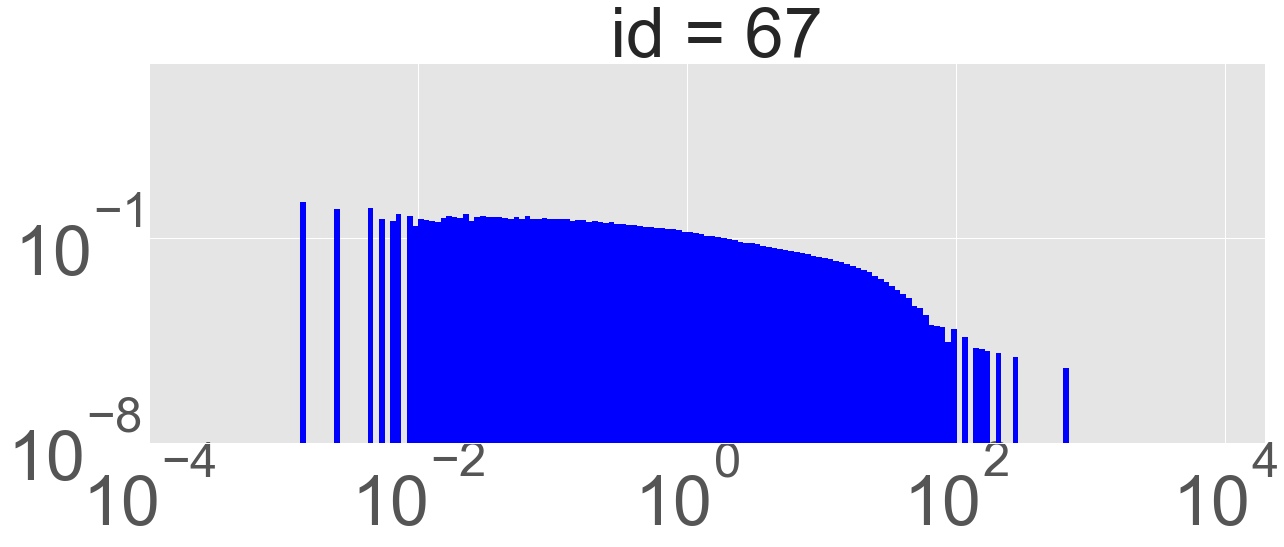

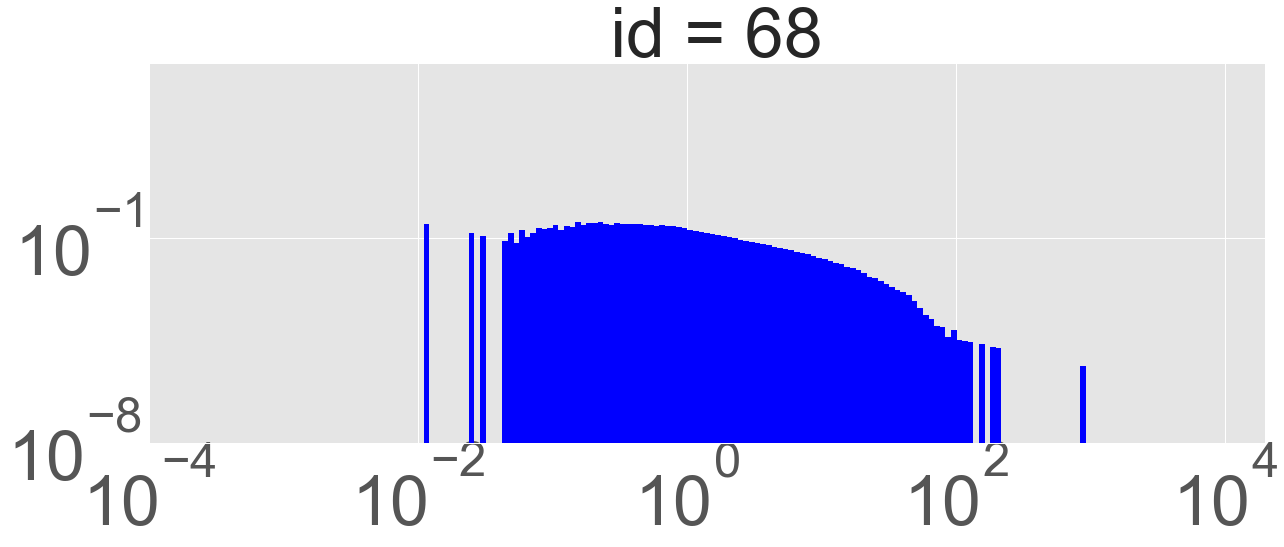

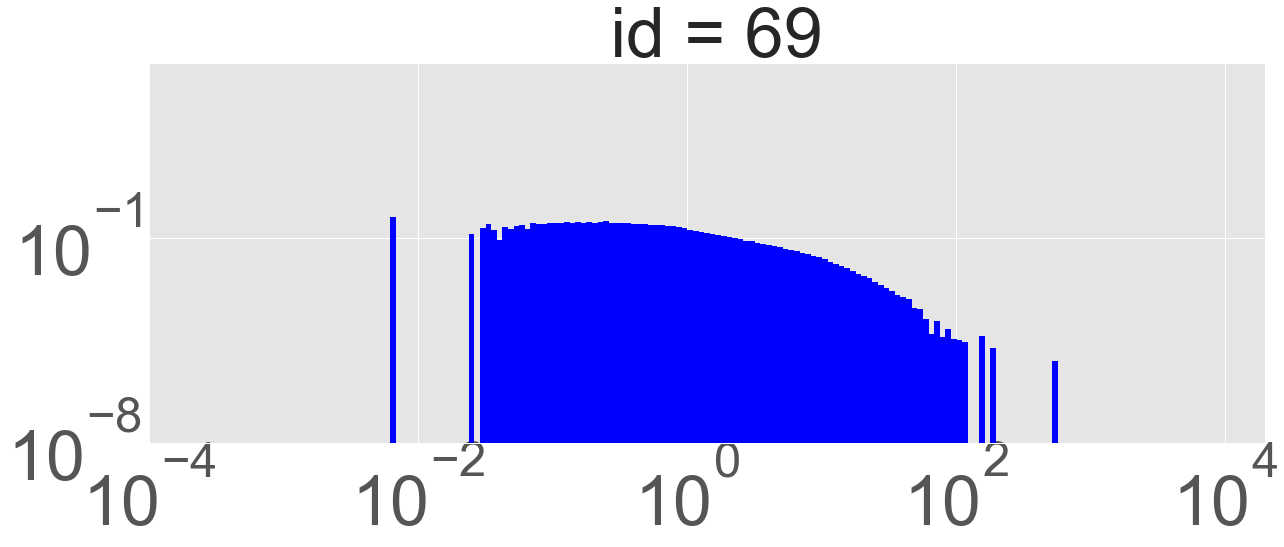

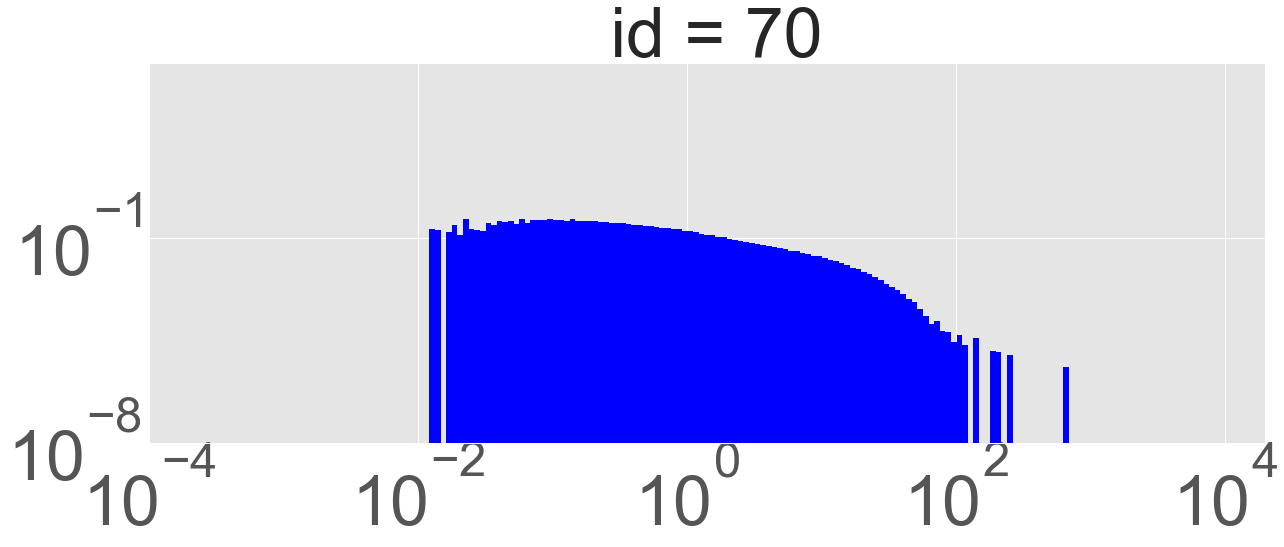

In [21]:
cnt1 = np.array([0, 0])
cnt2 = np.array([0, 0])
def plot_IPR_eigen(IPR, eigenvalues, id_group):
    ids = np.argsort(eigenvalues)
    #print eigenvalues[ids]
    eigenvalues = eigenvalues[ids]
    #print 'Eigen values len: ', len(eigenvalues)
    IPR = IPR[ids]
    colors = ['red', 'blue']
    '''
    plt.scatter(eigenvalues, IPR, c = colors[id_group], alpha=0.5)
    ax = plt.gca()
    ax.set_yscale("log", nonposy='clip')
    ax.set_xlabel('Eigen value', size=fontsize)
    ax.set_ylabel('IPR', size=fontsize)
    ax.set_xlim([-20000, 20000])
    ax.set_ylim([1.0/len(y), 2])
    plt.minorticks_on()
    '''
    plt.hist(eigenvalues, 100, color = colors[id_group])
    ax = plt.gca()
    ax.set_yscale("log", nonposy='clip')
    ax.set_xlim([-2000, 2000])
    
    #minor_ticks = np.arange(-20, 20, 5)
    #major_ticks = np.arange(-20, 20, 5)

    #ax.set_xticks(major_ticks)
    #ax.set_xticks(minor_ticks, minor=True)
    #ax.set_yticks(major_ticks)
    #ax.set_yticks(minor_ticks, minor=True)
    #ax.grid(which='minor', alpha=1, color="green")
    #ax.grid(which='major', alpha=1, color="green") 
    
def plot_hist(data, id_group, xlim, ylim, logx = True, logy = True, colors = ['red', 'blue', 'green']):
    bins = xlim
    if logx:
        bins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), 200)
    else:
        bins = np.linspace(bins[0], bins[-1], 200)
    plt.hist(data, bins = bins, color = colors[id_group], density = True)
    ax = plt.gca()
    if logx:
        ax.set_xscale("log", nonposx='clip')
    if logy:
        ax.set_yscale("log", nonposy='clip')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
        
def plot_IPR_eigen_sample(parenclitics, id_thr, id_sample, fig = None):
    parenclitic = parenclitics
    if fig is None:
        fig = plt.figure(figsize=(20, 7))
    if "thr_p" in config.params:
        parenclitic = parenclitics[id_thr]
        config.params["thr_p"].set_tick(id_thr)
        thr_p = config.params["thr_p"].value
    
    eigenvalues = parenclitic['eigenvalues'][id_sample]
    nz_ids = np.abs(eigenvalues) > 1e-5
    
    #print y[id_sample], np.sort(abs(eigenvalues))
    IPR = parenclitic['IPR'][id_sample]
    
    if nz_ids.sum() > 0:
        cnt1[y[id_sample]] += 1 
        plt.figure(fig.number)
        if "thr_p" in config.params:
            plt.title("thr = " + str(thr_p), size=fontsize)
        else:
            #plt.title("age = " + str(age[id_sample]) + " id = " + str(id_sample), size=fontsize)
            plt.title(" id = " + str(id_sample), size=fontsize)
        id_group = y[id_sample]
        #plot_IPR_eigen(IPR, eigenvalues, y[id_sample])
        #plot_degree(degrees, y[id_sample])
        #plot_betweenness(betweenness, y[id_sample])
        
        #plot_hist(parenclitic['degrees'][id_sample], id_group, [1, 20000], [1e-8, 1])
        #plot_hist(parenclitic['betweenness'][id_sample], id_group, [1, 20000], [1e-8, 1])
        #plot_hist(parenclitic['closeness'][id_sample], id_group, [1e-3, 1], [1e-8, 1])
        #plot_hist(parenclitic['eigenvalues_intervals_normalized'][id_sample], id_group, [1e-4, 20000], [1e-8, 1e4])
        #plot_hist(parenclitic['pagerank'][id_sample], id_group, [1e-5, 1e-2], [1, 2e5])
        #plot_hist(parenclitic['eigenvector_centrality'][id_sample], id_group, [1e-4, 1], [1e-5, 1e2], logy = False)
        plot_hist(parenclitic['eigenvalues'][id_sample], id_group, [1e-4, 20000], [1e-8, 1e5])
        
        fig.canvas.draw()
        fig.canvas.flush_events()
        #g = load_graph(id_thr, id_sample)
        #plot_adjacency(g, str(age[id_sample]), y[id_sample])
        print id_sample
        #plot_graph(id_sample)
    else:
        cnt2[y[id_sample]] += 1 
    


id_thr = 5
figs = [plt.figure(figsize=(20, 7)), plt.figure(figsize=(20, 7))]
for id_sample in config.params["id_sample"]:
    #print id_sample, '/', config.params["id_sample"].num_ticks
    #if id_sample > 11:
    #    break
    #if y[id_sample] == 0:
    #    continue;
    plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, id_sample = id_sample)#, fig = figs[y[id_sample]])
#for id_thr, thr_p in enumerate(config.params["thr_p"]):
#    plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, thr_p = thr_p, id_sample = 4, fig = plt.figure(figsize=(20, 7)))
#    plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, thr_p = thr_p, id_sample = 2, fig = plt.figure(figsize=(20, 7)))
print cnt1
print cnt2
print cnt1.sum() + cnt2.sum()

#plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, id_sample = 111)

#plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, id_sample = 669)
#plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, id_sample = 597)
#plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, id_sample = 609)
#plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, id_sample = 262)
#plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, id_sample = 724)

In [18]:
print y

[0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1]


In [4]:
def plot_adjacency(g, title_name, id_group, fig = None):
    import matplotlib.colors
    if fig is None:
        fig = plt.figure(figsize = (10, 10))
    plt.figure(fig.number)
    colors = ['red', 'blue']
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", colors[id_group]])
    plt.title(title_name, size = fontsize)
    plt.imshow(g.get_adjacency().data, cmap = cmap)
    
'''
for id_thr, thr_p in enumerate(config.params["thr_p"]):
    id_sample = 0
    g = load_graph(id_thr, id_sample)
    plot_adjacency(g, 'thr_p = ' + str(thr_p), y[id_sample])
    id_sample = 2
    g = load_graph(id_thr, id_sample)
    plot_adjacency(g, 'thr_p = ' + str(thr_p), y[id_sample])


id_thr = 0
for id_sample in config.params['id_sample']:
    g = load_graph(id_thr, id_sample)
    if g.ecount() > 0:
        plot_adjacency(g, str(age[id_sample]), y[id_sample])
'''

'\nfor id_thr, thr_p in enumerate(config.params["thr_p"]):\n    id_sample = 0\n    g = load_graph(id_thr, id_sample)\n    plot_adjacency(g, \'thr_p = \' + str(thr_p), y[id_sample])\n    id_sample = 2\n    g = load_graph(id_thr, id_sample)\n    plot_adjacency(g, \'thr_p = \' + str(thr_p), y[id_sample])\n\n\nid_thr = 0\nfor id_sample in config.params[\'id_sample\']:\n    g = load_graph(id_thr, id_sample)\n    if g.ecount() > 0:\n        plot_adjacency(g, str(age[id_sample]), y[id_sample])\n'

(12L, 12L)
[[0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 1 0 1 1]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 0 0 0 0 1 0 1]
 [0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 1 0 0 0 0 0 0]]
[1, 4, 1, 1, 9, 3, 2, 1, 2, 2, 3, 3]
[0.17427939 0.18636209 0.22869995 0.13640528 0.23235421 0.16684828
 0.12537651 0.12713893 0.45569492 0.45569492 0.37129384 0.37129384]
[ 3.63739351e+00 -3.27157098e+00 -1.53173493e+00 -1.19943873e+00
 -7.83381779e-01  1.53580056e+00  8.70422713e-01  7.42509646e-01
  5.79634233e-17 -3.16480318e-17 -3.16480318e-17 -7.03269895e-18]


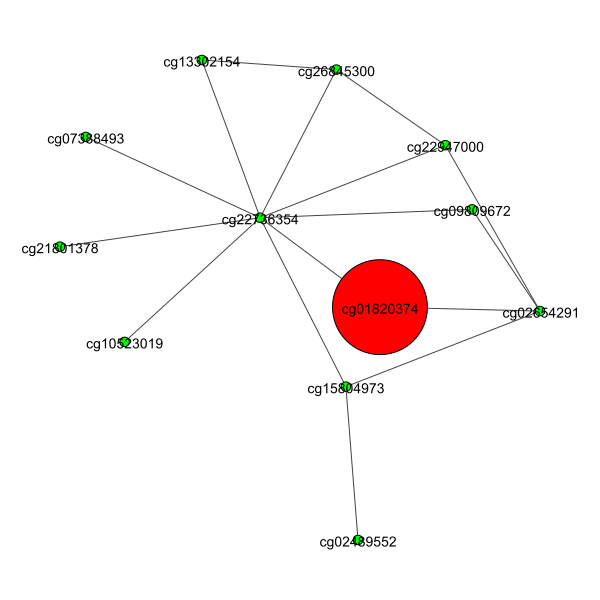

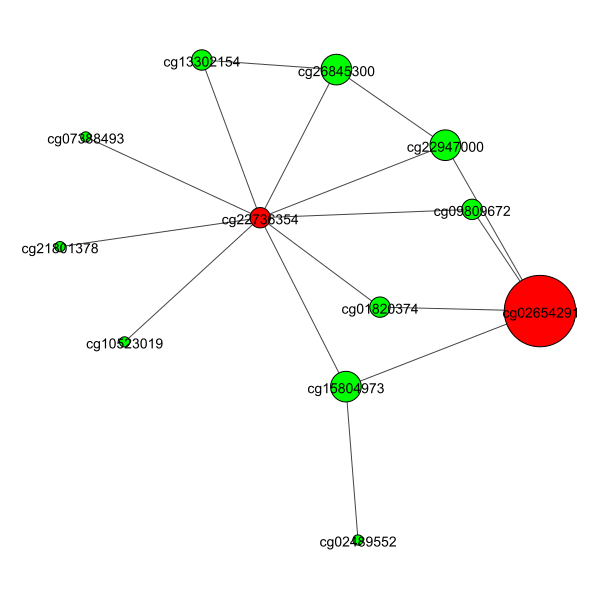

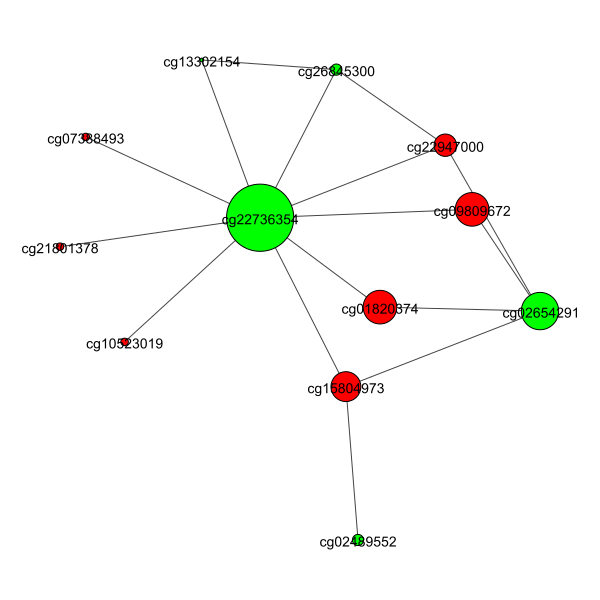

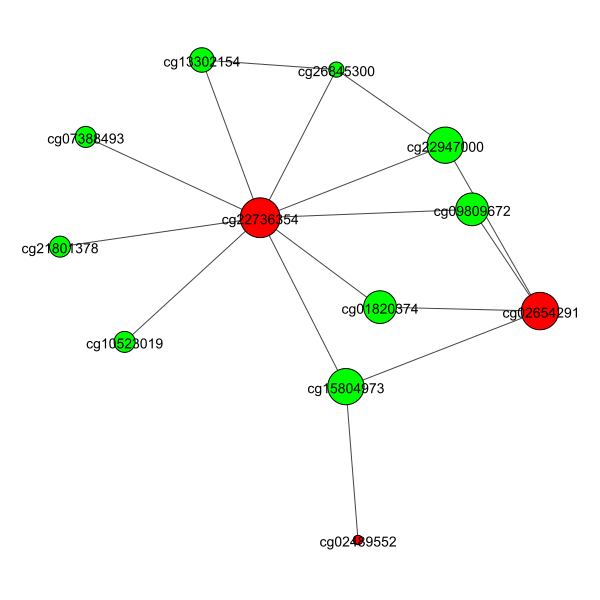

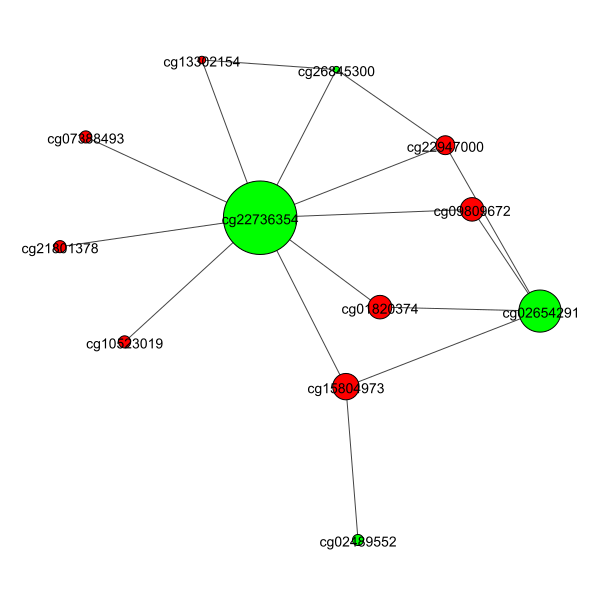

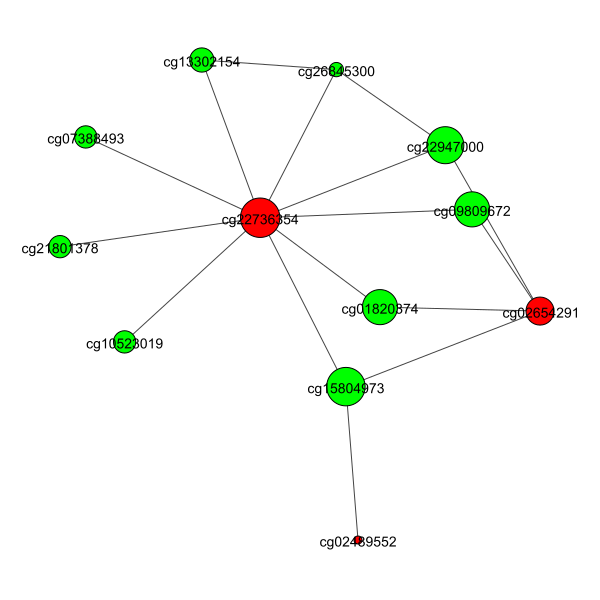

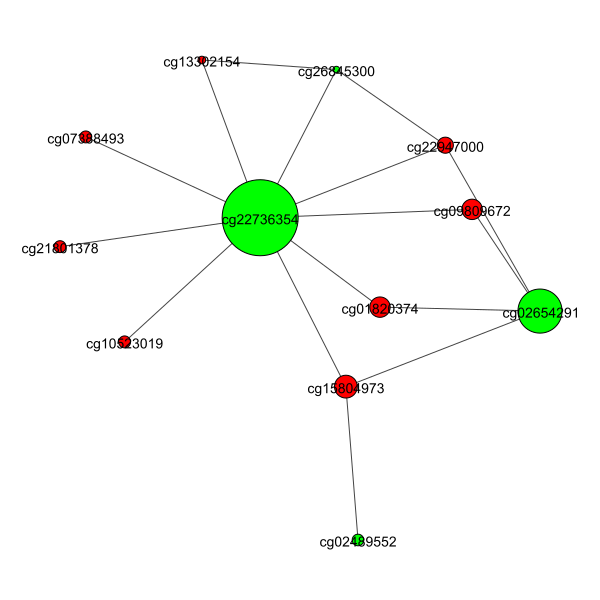

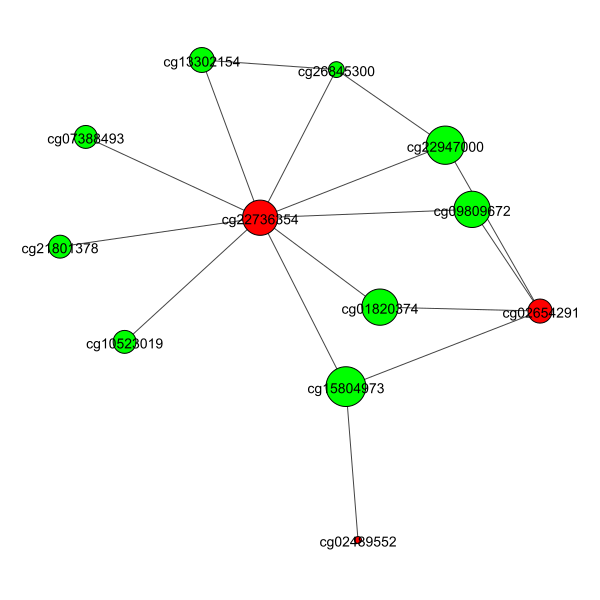

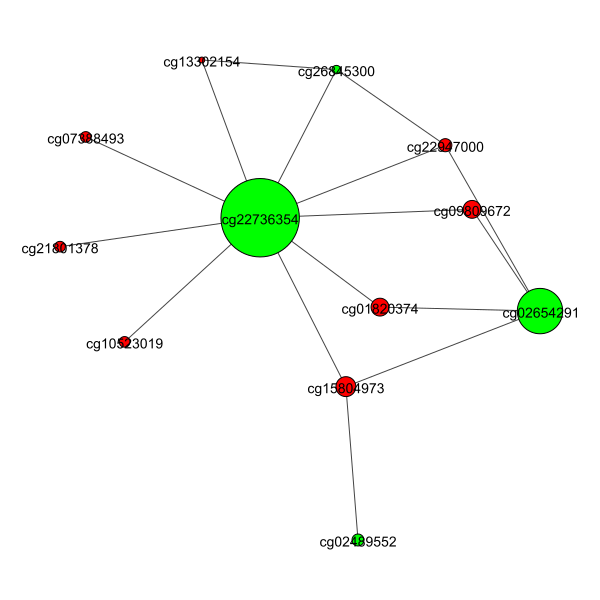

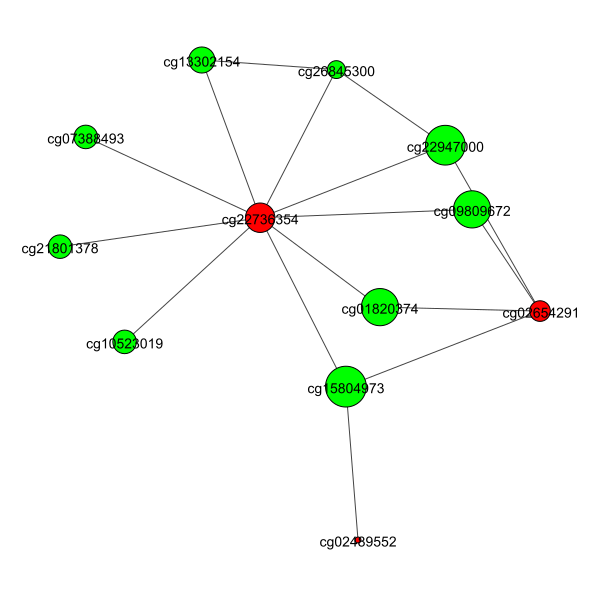

In [17]:
def make_eigenvectors(id_thr, id_sample):
    g = load_graph(config, X, genes_names, id_thr, id_sample)
    largest = g.clusters().giant()
    m = np.array(largest.get_adjacency().data)
    print m.shape
    print m
    print largest.degree()
    eigenvalues, eigenvectors = LA.eig(m)
    
    #print eigenvectors
    #print eigenvalues
    
    #print "botva"
    #for i in range(len(m)):
    #    x = np.dot(m, eigenvectors[:, i])
    #    print i
    #    print x / eigenvectors[:, i]
    #    print eigenvalues[i]
    
    #print "here"
    #Suppose symmetric matrix
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)
    
    IPR = parenclitics["IPR"][id_sample]
    print IPR
    print eigenvalues
    
    ids = -1
    for i in range(len(m)):
        if eigenvalues[i] < 1e-5:
            if ids == -1 or IPR[i] > IPR[ids]:
                ids = i
    
    layout = None
    curv = np.zeros(len(m))
    curv[:] = 0.1
    curv[6] = -1
    for i in range(10):
        curv = curv / np.linalg.norm(curv)
        _, layout = plot_graph(id_sample = id_sample, vcolor = curv, layout = layout)
        curv = np.dot(m, curv)
    
    return
    
    ids = 8
    
    print len(IPR), len(eigenvalues)
    
    ids_order = np.argsort(abs(IPR))
    for ids in ids_order:#range(len(m)):
        print 'id:', ids
        print 'eigenvalue:', eigenvalues[ids]
        print 'IPR:', IPR[ids]

        #ids = np.argsort(abs(eigenvalues))
        #ids = abs(eigenvalues) < 1e-6
        eigenvalue = eigenvalues[ids]
        eigenvector = eigenvectors[:, ids]
        
        ids = np.argsort(np.abs(eigenvector))
        names = np.array(largest.vs["name"])
        #print names
        print np.abs(eigenvector).max()
        #print np.array(largest.degree())

        #for i in range(len(m)):
        #    print names[i], eigenvector[i]

        names = names[ids[-10:]]
        #print names
        #print eigenvector[ids[-10:]]
        #print np.array(largest.degree())[ids[-10:]]
        #if len(eigenvalues) <= 1:
        #    return

        #print eigenvalues
        #print eigenvectors
        #eigenvectors = np.minimum(abs(eigenvectors), 100)

        #print 'Number of vertices:', largest.vcount()
        #print 'Number of edges:', largest.ecount(), '/', largest.vcount() * (largest.vcount() - 1) / 2

        #print 'Count lambda = 0:', ids.sum(), '/', len(m)
        _, layout = plot_graph(id_sample = id_sample, vcolor = eigenvector, layout = layout)
        #plot_eigenvectors_2d(eigenvector)
    
    
def plot_eigenvectors_2d(eigenvectors):
    plt.figure(figsize = (20, 20))
    #plt.imshow(eigenvectors, cmap='jet')
    plt.plot(eigenvectors)
    #plt.colorbar()
    plt.title('Age: ' + str(age[config.params['id_sample'].value]), size=fontsize)

    
#for id_sample in config.params["id_sample"]:
#    make_eigenvectors(id_thr = 0, id_sample = id_sample)
make_eigenvectors(id_thr = 0, id_sample = 597)
#plot_IPR_eigen_sample(parenclitics, id_thr = id_thr, id_sample = 597)

#make_eigenvectors(id_thr = 0, id_sample = 0)

In [18]:
a = [[0,1,2,3],[3,4,2,1],[-1,2,3,5]]
print np.argsort(a, 0)

[[2 0 0 1]
 [0 2 1 0]
 [1 1 2 2]]


In [47]:
from IPython.core.display import display, SVG

id_sample = 0
id_thr = 0
import cairo
#def make_eigenvectors(id_thr, id_sample):
#print np.array(g.degree()) == 0

def plot_graph(id_sample, g = None, vcolor = None, is_show = True, layout = None):
    if g is None:
        g = load_graph(config, X, genes_names, id_thr, id_sample)
    
    #to_delete_ids = [v.index for v in g.vs if v.index > 48]
    #g.delete_vertices(to_delete_ids)
    
    to_delete_ids = [v.index for v in g.vs if v.degree() == 0]
    g.delete_vertices(to_delete_ids)
    
    visual_style = {}
    if not is_show:
        visual_style["bbox"] = (2048, 1024)
    visual_style["margin"] = 100
    visual_style["vertex_label"] = g.vs["name"]
    if vcolor is not None:
        eps = 1e-5
        visual_style["vertex_color"] = map(lambda x: "red" if x < -eps else ("green" if x > eps else "yellow"), vcolor)
        visual_style["vertex_size"]  = map(lambda x: abs(x) * 100, vcolor)
    else:
        if y[id_sample] == 0:
            visual_style["vertex_color"] = "#1E88E5"
        else:
            visual_style["vertex_color"] = "#E53935"
        #visual_style["vertex_size"]  = 150
        #visual_style["vertex_label_size"]  = 30
        #visual_style["vertex_frame_width"]  = 0
        #visual_style["vertex_label_dist"]  = 0
        visual_style["edge_color"]  = "#1B5E20"
        #visual_style["edge_width"]  = 3
        visual_style["edge_curved"]  = True
        
        
    #print g.vs["name"]
    #print g.degree()
    #g.vs["label"] = None
    if layout is None:
        layout = g.layout_kamada_kawai()
        
    p = igraph.plot(g, layout = layout, **visual_style)
    #print p.__dict__ 
    if is_show:
        display(SVG(p._repr_svg_()))
    return g, layout, p
'''
for id_sample in config.params["id_sample"]:
    #if id_sample > 10: break
    print id_sample, age[id_sample]
    p = plot_graph(id_sample, is_show = False)
    p.save(config.ofname(["graph", ["g", "age-" + str(age[id_sample])]], ext = ".png", include_set = config.params_sets["graph"]))
    #display(SVG(p._repr_svg_()))
'''
#make_eigenvectors(0, 0)
0

0

In [39]:
_, layout, p = plot_graph(id_sample = 0, is_show = False)
#graph_img_path = config.ofname(["graph", ["g", "age-" + str(age[id_sample])]], ext = ".png", include_set = config.params_sets["graph"])
graph_img_path = config.ofname(["graph", ["g"]], ext = ".png", include_set = config.params_sets["graph"])
p.save(graph_img_path)
print graph_img_path

F:\PC\UNN\Scientific\Gerontology\data\GSE63347\params\num_genes_15022\kde_mask_normal_mask\algorithm_svc\graph\graph_id_sample_0.png


In [23]:
g = load_graph(0, 597)
largest = g.clusters().giant()
m = np.array(largest.get_adjacency().data)


x = np.zeros((len(m), ))
x[1] = 1
x[0] = 1
print m
print x
print np.dot(m, x)

[[0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 1 0 1 1]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 1 0 0 0 0 1 0 1]
 [0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 1 0 0 0 0 0 0]]
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 2. 1.]


['red', 'red', 'green', 'red', 'red', 'green', 'red', 'red', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'red', 'green', 'red', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'green', 'red', 'green', 'green', 'green', 'green']
(71L, 2L)
[-2.1604916]
[3.28403546 3.05199589]
[ True  True False  True  True False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True False  True False False False False Fa

Text(0,0.5,'PCDHB13')

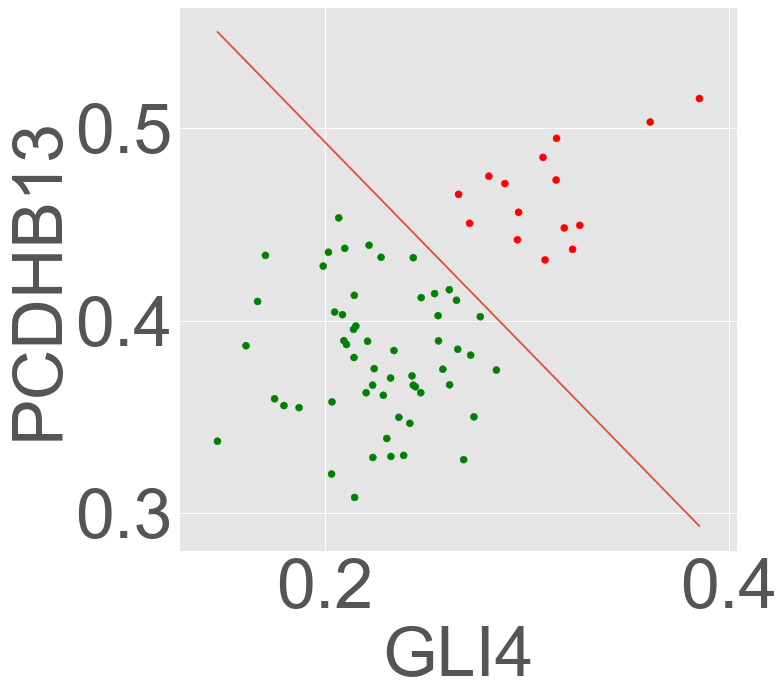

In [67]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_delta = (x.max() - x.min()) * 0.05
    y_delta = (y.max() - y.min()) * 0.05
    x_min, x_max = x.min() - x_delta, x.max() + x_delta
    y_min, y_max = y.min() - y_delta, y.max() + y_delta
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


X_i = [0.16616926, 0.18766451, 0.20533998, 0.1934791, 0.20651284, 0.21282898
, 0.20418286, 0.1750842, 0.18754235, 0.17966893, 0.18260968, 0.17110671
, 0.19376808, 0.1993486, 0.18421307, 0.19052047, 0.17073588, 0.2107633
, 0.18080328, 0.196998, 0.1870945, 0.19583793, 0.18848248, 0.19490686
, 0.18902732, 0.20331325, 0.19458884, 0.19968341, 0.17521472, 0.17383799
, 0.19135928, 0.16871956, 0.1880053, 0.20690456, 0.21179394, 0.22091497
, 0.1858241, 0.18900044, 0.198528, 0.18784317, 0.16841726, 0.19122083
, 0.19349274, 0.20659587, 0.21490818, 0.20944539, 0.19004983, 0.18849541
, 0.1912127, 0.17509924, 0.19538578, 0.18930054, 0.20623963, 0.22024772
, 0.19527864, 0.19294931, 0.18149057, 0.18642572, 0.1845426, 0.16927539
, 0.18272088, 0.18779635, 0.19839141, 0.18597233, 0.19850445, 0.17925741
, 0.17014192, 0.18552326, 0.19154608, 0.18154237, 0.19689979]
X_j = [0.17026743, 0.18395859, 0.19111441, 0.17036219, 0.18868251, 0.17038445
, 0.16795364, 0.18350577, 0.18012288, 0.17014538, 0.17887075, 0.17557557
, 0.19368398, 0.1683528, 0.18179943, 0.18519178, 0.17588024, 0.16686665
, 0.17235874, 0.17513168, 0.1759186, 0.18389139, 0.17738445, 0.1738868
, 0.17882958, 0.1595369, 0.17370713, 0.18543673, 0.17033514, 0.16628811
, 0.16929525, 0.16505072, 0.1805281, 0.19259228, 0.16718784, 0.17443527
, 0.17622831, 0.18333547, 0.16948552, 0.18421741, 0.17415582, 0.1665117
, 0.17724927, 0.18346028, 0.16779758, 0.16108562, 0.17331685, 0.17664169
, 0.17852263, 0.16552612, 0.18160038, 0.16970119, 0.18408367, 0.16943483
, 0.18755595, 0.18517013, 0.18260306, 0.19082627, 0.19155468, 0.17958319
, 0.17671557, 0.18636696, 0.17055152, 0.17726035, 0.18647444, 0.17696123
, 0.17164877, 0.17593716, 0.18084052, 0.17498954, 0.18165925]


#y = np.array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
#, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1])

#X_i = [0, 1, 2, 3, 4, 5, 6]
#X_j = [3, 0, 9, 2, 5, 2, 0]
#y   = [0, 0, 0, 1, 0, 0, 0]

X_i = np.array(X_i)
X_j = np.array(X_j)
y = np.array(y)

X_i = X[:, 12316]
X_j = X[:, 12834]


print map(lambda x: "red" if x == 0 else "green", y)
from sklearn import svm, datasets

#clf = svm.SVC(kernel = 'linear', C = 1, class_weight = "balanced")
clf = svm.LinearSVC(C = 1, class_weight = "balanced")

#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#clf = LinearDiscriminantAnalysis()

data = np.array([X_i, X_j]).T
print data.shape
f = clf.fit(data, y == 0)
coef = f.coef_[0]

print f.intercept_
print coef
G = clf.predict(data)
plt.figure(figsize=(10,10))
ax = plt.gca()

#xx, yy = make_meshgrid(X_i, X_j)
    
#plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
print G

xt = np.array([X_i.min(), X_i.max()])

print coef[0] / coef[1]

plt.scatter(X_i, X_j, c = map(lambda x: "red" if x == 0 else "green", y))
plt.plot(xt, -(f.intercept_[0] + coef[0] * xt) / coef[1])
plt.xlabel("GLI4", fontsize=fontsize)
plt.ylabel("PCDHB13", fontsize=fontsize)

F:\PC\UNN\Scientific\Gerontology\data\GSE63347\params\num_genes_15022\kde_mask_normal_mask\algorithm_svc\graphs\graph_id_sample_0.npz
here
1053.43299985


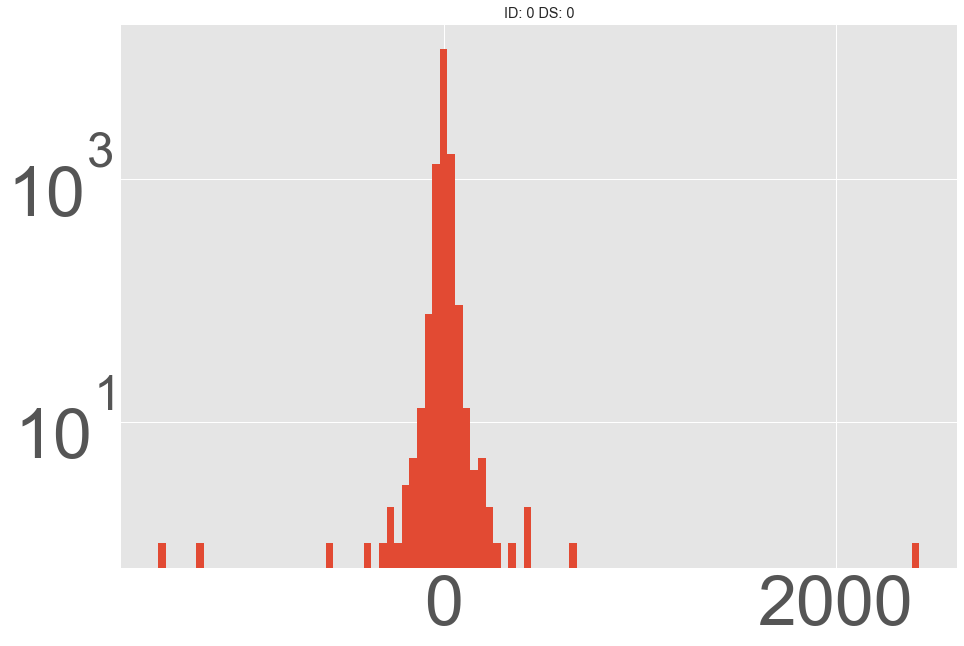

F:\PC\UNN\Scientific\Gerontology\data\GSE63347\params\num_genes_15022\kde_mask_normal_mask\algorithm_svc\graphs\graph_id_sample_1.npz
here
895.085000038


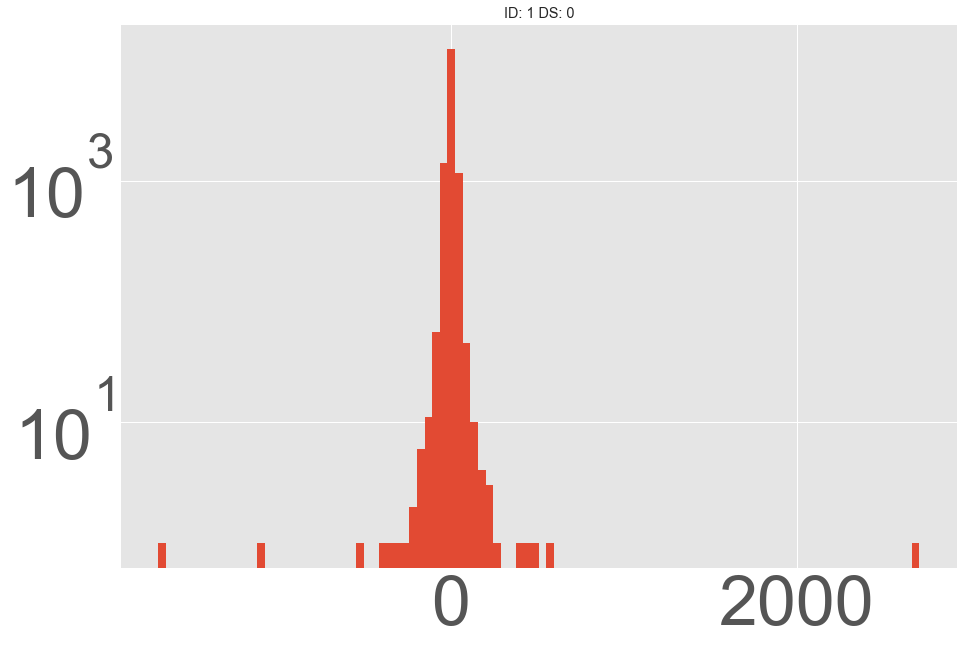

F:\PC\UNN\Scientific\Gerontology\data\GSE63347\params\num_genes_15022\kde_mask_normal_mask\algorithm_svc\graphs\graph_id_sample_2.npz
here
871.479000092


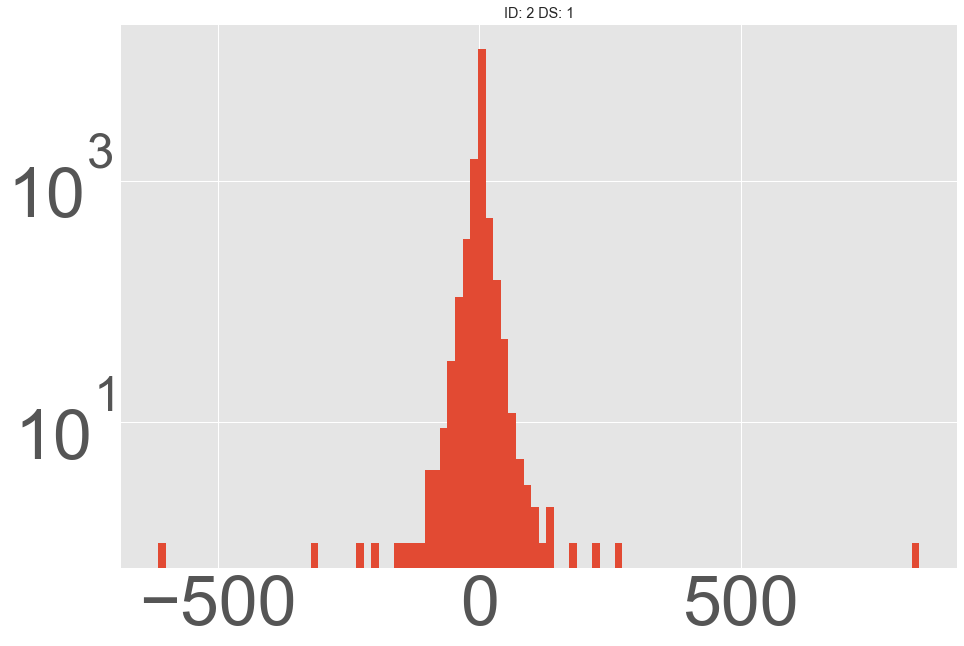

F:\PC\UNN\Scientific\Gerontology\data\GSE63347\params\num_genes_15022\kde_mask_normal_mask\algorithm_svc\graphs\graph_id_sample_3.npz
here
903.57400012


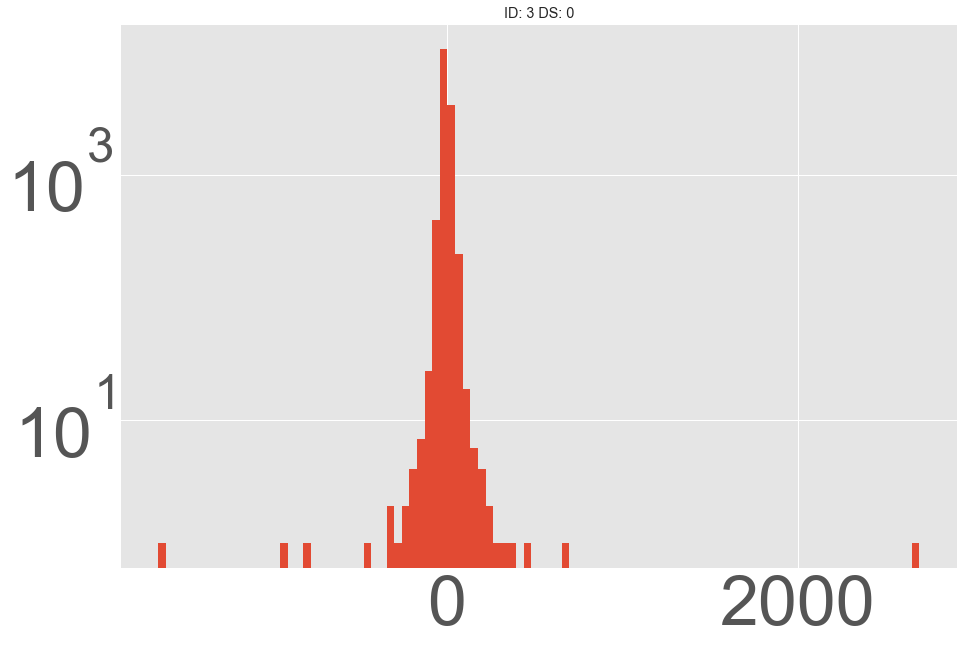

F:\PC\UNN\Scientific\Gerontology\data\GSE63347\params\num_genes_15022\kde_mask_normal_mask\algorithm_svc\graphs\graph_id_sample_4.npz
here
851.314999819


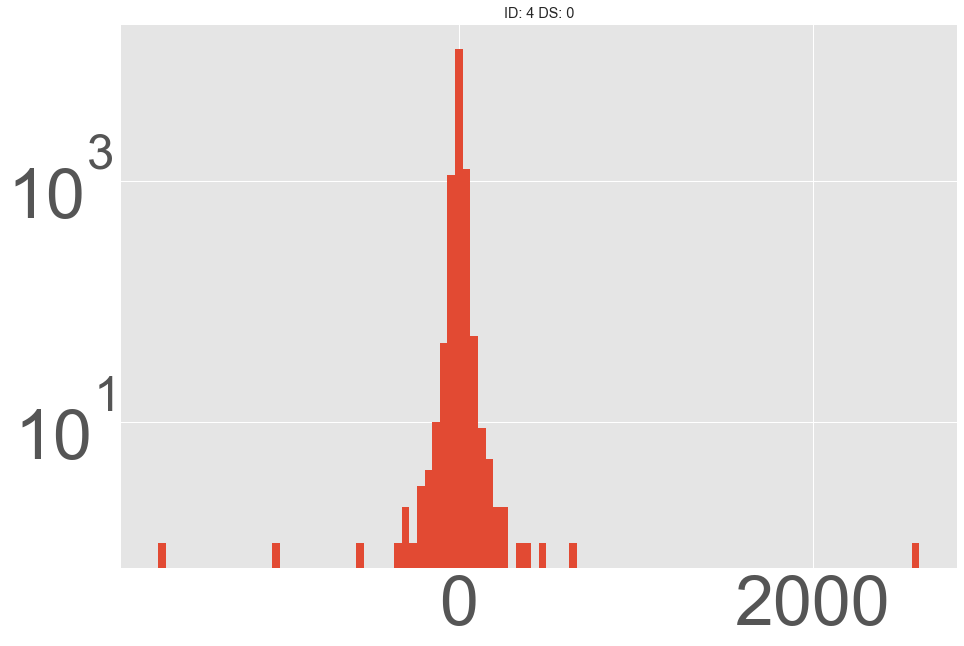

F:\PC\UNN\Scientific\Gerontology\data\GSE63347\params\num_genes_15022\kde_mask_normal_mask\algorithm_svc\graphs\graph_id_sample_5.npz
here
784.894999981


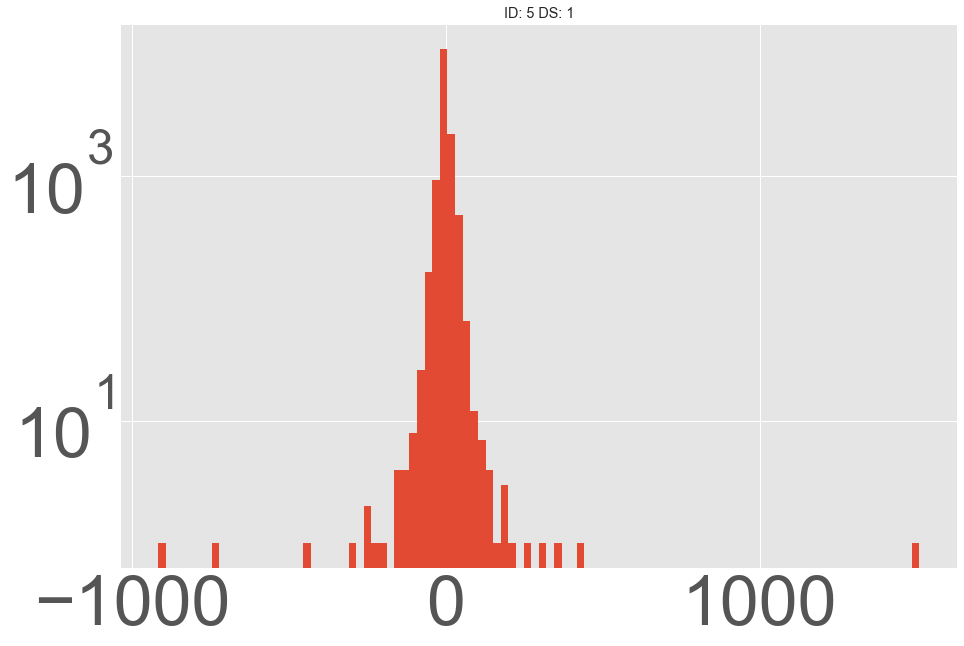

F:\PC\UNN\Scientific\Gerontology\data\GSE63347\params\num_genes_15022\kde_mask_normal_mask\algorithm_svc\graphs\graph_id_sample_6.npz
here


KeyboardInterrupt: 

In [4]:
def cut_weight_graph(g, num_edges_remain):
    num_edges = g.ecount()
    dist = np.array(g.es["weight"])
    k = num_edges - num_edges_remain
    remove_ids = np.argpartition(dist, k)[:k]

    gc = g.copy()
    gc.delete_edges(remove_ids)
    gc.delete_vertices([v.index for v in gc.vs if v.degree() == 0])
    return gc

from scipy import sparse
from scipy.sparse.linalg import eigs, eigsh
from time import time
from numpy import linalg as LA

num_edges = 100
V = []
for id_sample in config.params["id_sample"]:
    data = get_graph_file(config, id_sample = id_sample)
    #ind = data['IDS']
    #ind = np.concatenate([ind, np.array([ind[:, 1], ind[:, 0]]).T])
    #mat_coo = sparse.coo_matrix((np.ones(ind.shape[0], dtype), (ind[:, 0], ind[:, 1])), shape = (X.shape[1], X.shape[1]))
    
    m = data['G']
    m = np.unpackbits(m, axis = 1)[:, :X.shape[1]].astype(np.bool)
    m = np.logical_or(m, m.T)
    
    #g = load_graph(config, X, genes_names, id_sample = id_sample)
    #g = g.clusters().giant()
    #ind = np.array([[e.source, e.target] for e in g.es])
    #print ind.shape, g.vcount()
    
    #ind = np.concatenate([ind, np.array([ind[:, 1], ind[:, 0]]).T])
    
    #mat_coo = sparse.coo_matrix((np.ones(ind.shape[0]), (ind[:, 0], ind[:, 1])), shape = (g.vcount(), g.vcount()))
    print 'here'
    be = time()
    #vals, vecs = eigsh(mat_coo, k = mat_coo.shape[0] - 1, return_eigenvectors = False)
    vals, vecs = LA.eigh(m)
    en = time()
    print en - be
    
    plt.figure(figsize=(15,10))
    plt.hist(vals, 100)
    ax = plt.gca()
    ax.set_yscale('log')
    plt.title('ID: ' + str(id_sample) + ' DS: ' + str(y[id_sample]))
    plt.show()
    continue
    #g = load_graph(config, X, genes_names, id_sample = id_sample)
    #break
    gc = cut_weight_graph(g, num_edges)
    V.extend([v for v in gc.vs])
    print id_sample, 'y =', y[id_sample]
    #plot_graph(id_sample, gc)
    print len(np.unique(np.array(V)))

In [14]:
print np.all(m == m.T)
print vals.shape
print np.sort(vals)

False
(15022L,)
[0. 0. 0. ... 0. 0. 0.]


(array([3.00000e+00, 3.60000e+01, 1.67000e+02, 1.02800e+03, 5.56900e+03,
        1.56650e+04, 2.85130e+04, 5.49510e+04, 1.19547e+05, 1.90372e+05,
        2.59748e+05, 3.17175e+05, 3.63461e+05, 3.94692e+05, 4.46934e+05,
        4.44579e+05, 4.63791e+05, 6.37063e+05, 6.67986e+05, 6.73278e+05,
        6.70804e+05, 6.61037e+05, 6.31153e+05, 6.05357e+05, 5.84125e+05,
        5.65531e+05, 5.32922e+05, 4.86361e+05, 4.20596e+05, 3.35351e+05,
        2.46559e+05, 1.96971e+05, 1.61926e+05, 1.19763e+05, 8.89270e+04,
        6.26250e+04, 4.49390e+04, 3.21200e+04, 2.28820e+04, 1.64470e+04,
        1.18790e+04, 8.64700e+03, 6.31100e+03, 4.62100e+03, 3.55000e+03,
        2.63900e+03, 1.89300e+03, 1.50700e+03, 1.14300e+03, 9.59000e+02,
        7.67000e+02, 6.12000e+02, 4.39000e+02, 4.20000e+02, 3.17000e+02,
        2.51000e+02, 2.47000e+02, 2.32000e+02, 2.20000e+02, 1.57000e+02,
        1.50000e+02, 1.27000e+02, 1.35000e+02, 9.60000e+01, 9.20000e+01,
        8.90000e+01, 7.00000e+01, 5.50000e+01, 5.20

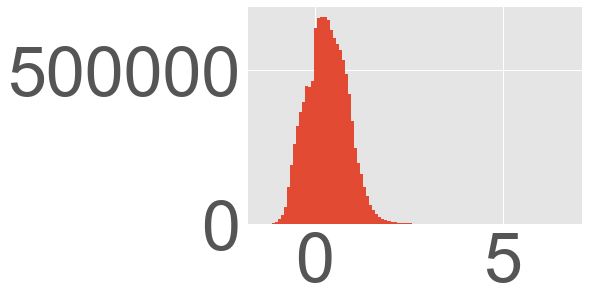

In [34]:
np.array(g.es["weight"])

In [3]:
import itertools
def glance(d):
    return dict(itertools.islice(d.iteritems(), 3))

def get_graph_file(config, id_thr = 0, id_sample = 0):
    config.params["id_sample"].set_tick(id_sample)
    if "thr_p" in config.params:
        config.params["thr_p"].set_tick(id_thr)
    fname = config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"])
    print fname
    data = np.load(fname)
    return data
    
def load_graph(config, X, genes_names, id_thr = 0, id_sample = 0):
    data = get_graph_file(config, id_thr, id_sample)
    if 'IDS' in data:
        d = data['D']
        ids = data['IDS']
        g = igraph.Graph(n = X.shape[1], edges = zip(*ids.T))
        g.es["weight"] = d
    else:
        g = data['G']
        g = np.unpackbits(g, axis = 1)[:, :X.shape[1]].astype(np.bool)
        g = igraph.Graph.Weighted_Adjacency(g.tolist(), mode=igraph.ADJ_UNDIRECTED)
    
    g.vs["name"] = genes_names
    g.vs["label"] = genes_names
    return g
